# 02 Facebook LDA

## LDA Topic Modelling LDA on Facebook Government Posts during 2020Q1-2021Q3 

References:
- https://malaya.readthedocs.io/en/latest/load-preprocessing.html
- https://malaya.readthedocs.io/en/latest/_modules/malaya/preprocessing.html#Tokenizer

In [1]:
#!pip3 install malaya
import malaya
malaya.__version__


'4.6'

# 1.0 Import Data

In [2]:
import pandas as pd
fb_df = pd.read_csv("Data/fb_clean.csv",encoding='utf-8',index_col=0)
fb_df

message       date
1932  Malaysia berjaya menangani isu kumpulan pengga...   1/1/2020
1933  Tahniah Datuk Seri Mohd Zuki Ali atas pelantik...   1/1/2020
1931  Terima kasih Agensi Penguatkuasaan Maritim Mal...   1/2/2020
5490  Today marks an important milestone for Malaysi...   1/2/2020
5491  Tahniah dan syabas diucapkan kepada YBhg Dato’...   1/2/2020
...                                                 ...        ...
8746  Kadar kebolehjangkitan Covid-19 atau Ro/Rt pad...  9/30/2021
8747  KEMUDAHAN SUAMI ATAU WARIS KELUARGA TERDEKAT M...  9/30/2021
8748  Kenyataan Akhbar KPK 30 September 2021 û Situa...  9/30/2021
8749  Status terkini Kapasiti & Penggunaan Katil COV...  9/30/2021
8750  Sehingga 30 September 2021: Jumlah kes COVID-1...  9/30/2021

[9141 rows x 2 columns]

In [3]:
# sort data by date
fb_df = fb_df.sort_values(by=['date'])
fb_df

message      date
1932  Malaysia berjaya menangani isu kumpulan pengga...  1/1/2020
1933  Tahniah Datuk Seri Mohd Zuki Ali atas pelantik...  1/1/2020
4180  KENYATAAN AKHBAR MENTERI KANAN PERTAHANAN MENG...  1/1/2021
4181  Situasi terkini 1 Januari 2021 #COVID19 di Mal...  1/1/2021
4182   SOP PERINTAH KAWALAN PERGERAKAN PEMULIHAN (PKPP)  1/1/2021
...                                                 ...       ...
1110  Bermula 16 September 2021, penduduk Lembah Kla...  9/9/2021
1109  Dapatkan semua data dan analisa terkini mengen...  9/9/2021
8591  Sehingga 9 September 2021: Jumlah kes COVID-19...  9/9/2021
1117  Peratusan terkini kadar vaksinasi populasi dew...  9/9/2021
8590  Status terkini Kapasiti & Penggunaan Katil COV...  9/9/2021

[9141 rows x 2 columns]

In [4]:
# set date as index
fb_df.set_index('date',inplace = True)
fb_df

message
date                                                       
1/1/2020  Malaysia berjaya menangani isu kumpulan pengga...
1/1/2020  Tahniah Datuk Seri Mohd Zuki Ali atas pelantik...
1/1/2021  KENYATAAN AKHBAR MENTERI KANAN PERTAHANAN MENG...
1/1/2021  Situasi terkini 1 Januari 2021 #COVID19 di Mal...
1/1/2021   SOP PERINTAH KAWALAN PERGERAKAN PEMULIHAN (PKPP)
...                                                     ...
9/9/2021  Bermula 16 September 2021, penduduk Lembah Kla...
9/9/2021  Dapatkan semua data dan analisa terkini mengen...
9/9/2021  Sehingga 9 September 2021: Jumlah kes COVID-19...
9/9/2021  Peratusan terkini kadar vaksinasi populasi dew...
9/9/2021  Status terkini Kapasiti & Penggunaan Katil COV...

[9141 rows x 1 columns]

In [5]:
#tweets_df.groupby(['date'])
fb_df = fb_df.sort_values(by=['date'])
fb_df

message
date                                                       
1/1/2020  Malaysia berjaya menangani isu kumpulan pengga...
1/1/2020  Tahniah Datuk Seri Mohd Zuki Ali atas pelantik...
1/1/2021  Status terkini COVID-19 setakat 1 Januari 2021...
1/1/2021  Kenyataan Akhbar KPK 1 Januari 2021 ?Situasi S...
1/1/2021  Rukun Islam ada 5 perkara dan membayar zakat a...
...                                                     ...
9/9/2021  Kenyataan Akhbar YBMK 9 September 2021 û  Pela...
9/9/2021  Penamatan PKPD pada 10 September 2021  #MKN50 ...
9/9/2021  Peratusan terkini kadar vaksinasi populasi dew...
9/9/2021  Sila ambil maklum waktu operasi baharu bagi ti...
9/9/2021  Status terkini Kapasiti & Penggunaan Katil COV...

[9141 rows x 1 columns]

In [6]:
fb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9141 entries, 1/1/2020 to 9/9/2021
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  9064 non-null   object
dtypes: object(1)
memory usage: 142.8+ KB


# 2.0 Data Pre-processing

## 2.1 Conduct Pre-Precessing using NLTK Library

https://github.com/bicachu/short-text-topic-modeling-tutorial/blob/main/tweet_preprocessor.py


In [7]:
# run this code only for the first time
#!pip install tweet-preprocessor

In [8]:
# import library 

import numpy as np
import re
import nltk
import gensim
import tqdm

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import trange, tqdm


# Download nltk word libraries if not present
# nltk.download('wordnet')
# nltk.download('stopwords')

punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'         # define a string of punctuation symbols

# Functions to clean tweets
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

def remove_users(tweet):
    """Takes a string and removes retweet and @user information"""
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove re-tweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove tweeted at
    return tweet

def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    return tweet

def remove_av(tweet):
    """Takes a string and removes AUDIO/VIDEO tags or labels"""
    tweet = re.sub('VIDEO:', '', tweet)  # remove 'VIDEO:' from start of tweet
    tweet = re.sub('AUDIO:', '', tweet)  # remove 'AUDIO:' from start of tweet
    return tweet

def tokenize(tweet):
    """Returns tokenized representation of words in lemma form excluding stopwords"""
    result = []
    for token in gensim.utils.simple_preprocess(tweet):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(
                token) > 2:  # drops words with 2 or less characters
            result.append(lemmatize_stemming(token))
    return result


def lemmatize_stemming(token):
    """Returns lemmatization of a token"""
    return WordNetLemmatizer().lemmatize(token, pos='v')


def preprocess_tweet(tweet):
    """Main master function to clean tweets, stripping noisy characters and tokenizing use lemmatization"""
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_av(tweet)
    tweet = tweet.lower()  # lower case
    tweet = re.sub('[' + punctuation + ']+', ' ', tweet)  # strip punctuation
    tweet = re.sub('\s+', ' ', tweet)  # remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet)  # remove numbers

    tweet_token_list = tokenize(tweet)  # apply lemmatization and tokenization

#     if bigrams:
#         tweet_token_list = tweet_token_list + [tweet_token_list[i] + '_' + tweet_token_list[i + 1]
#                                                for i in range(len(tweet_token_list) - 1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [11]:
# convert to string
fb_df['message']=fb_df['message'].apply(str)

In [12]:
# apply the preprocess function
fb_df['semiclean'] = fb_df.message.apply(preprocess_tweet)
fb_df['semiclean'].head()

date
1/1/2020    malaysia berjaya menangani isu kumpulan pengga...
1/1/2020    tahniah datuk seri mohd zuki ali atas pelantik...
1/1/2021    kenyataan akhbar menteri kanan pertahanan meng...
1/1/2021    situasi terkini januari malaysia sebanyak kes ...
1/1/2021       sop perintah kawalan pergerakan pemulihan pkpp
Name: semiclean, dtype: object

## 2.2 Conduct Pre-Precessing using Malaya Library

In [13]:
import re
import json
import ftfy
import html
from functools import lru_cache
from unidecode import unidecode
from malaya.text.rules import rules_normalizer
from malaya.text.regex import _expressions, _money
from malaya.text.english.words import words as _english_words
from malaya.path import PATH_PREPROCESSING, S3_PATH_PREPROCESSING
from malaya.function import check_file, validator
from herpetologist import check_type
from typing import Tuple, List

_annotate = [
    'hashtag',
    'allcaps',
    'elongated',
    'repeated',
    'emphasis',
    'censored',
]

_normalize = list(_expressions.keys())


def get_normalize():
    return _normalize


def get_annotate():
     return _annotate


def _case_of(text):
    return (
        str.upper
        if text.isupper()
        else str.lower
        if text.islower()
        else str.title
        if text.istitle()
        else str
    )


def unpack_english_contractions(text):
    """
    Replace *English* contractions in ``text`` str with their unshortened forms.
    N.B. The "'d" and "'s" forms are ambiguous (had/would, is/has/possessive),
    so are left as-is.
    Important Note: The function is taken from textacy (https://github.com/chartbeat-labs/textacy).
    """

    text = re.sub(
        r"(\b)([Aa]re|[Cc]ould|[Dd]id|[Dd]oes|[Dd]o|[Hh]ad|[Hh]as|[Hh]ave|[Ii]s|[Mm]ight|[Mm]ust|[Ss]hould|[Ww]ere|[Ww]ould)n't",
        r'\1\2 not',
        text,
    )
    text = re.sub(
        r"(\b)([Hh]e|[Ii]|[Ss]he|[Tt]hey|[Ww]e|[Ww]hat|[Ww]ho|[Yy]ou)'ll",
        r'\1\2 will',
        text,
    )
    text = re.sub(
        r"(\b)([Tt]hey|[Ww]e|[Ww]hat|[Ww]ho|[Yy]ou)'re", r'\1\2 are', text
    )
    text = re.sub(
        r"(\b)([Ii]|[Ss]hould|[Tt]hey|[Ww]e|[Ww]hat|[Ww]ho|[Ww]ould|[Yy]ou)'ve",
        r'\1\2 have',
        text,
    )
    text = re.sub(r"(\b)([Cc]a)n't", r'\1\2n not', text)
    text = re.sub(r"(\b)([Ii])'m", r'\1\2 am', text)
    text = re.sub(r"(\b)([Ll]et)'s", r'\1\2 us', text)
    text = re.sub(r"(\b)([Ww])on't", r'\1\2ill not', text)
    text = re.sub(r"(\b)([Ss])han't", r'\1\2hall not', text)
    text = re.sub(r"(\b)([Yy])(?:'all|a'll)", r'\1\2ou all', text)
    return text



def _get_expression_dict():
    return {
        k.lower(): re.compile(_expressions[k]) for k, v in _expressions.items()
    }


class Tokenizer:
    def __init__(self, lowercase=False, **kwargs):
        """
        Load Tokenizer object.
        Check supported regex pattern at https://github.com/huseinzol05/Malaya/blob/master/malaya/text/regex.py#L85

        Parameters
        ----------
        lowercase: bool, optional (default=False)
            lowercase tokens.
        emojis: bool, optional (default=True)
            True to keep emojis.
        urls: bool, optional (default=True)
            True to keep urls.
        tags: bool, optional (default=True)
            True to keep tags: <tag>.
        emails: bool, optional (default=True)
            True to keep emails.
        users: bool, optional (default=True)
            True to keep users handles: @cbaziotis.
        hashtags: bool, optional (default=True)
            True to keep hashtags.
        phones: bool, optional (default=True)
            True to keep phones.
        percents: bool, optional (default=True)
            True to keep percents.
        money: bool, optional (default=True)
            True to keep money expressions.
        date: bool, optional (default=True)
            True to keep date expressions.
        time: bool, optional (default=True)
            True to keep time expressions.
        acronyms: bool, optional (default=True)
            True to keep acronyms.
        emoticons: bool, optional (default=True)
            True to keep emoticons.
        censored: bool, optional (default=True)
            True to keep censored words: f**k.
        emphasis: bool, optional (default=True)
            True to keep words with emphasis: *very* good.
        numbers: bool, optional (default=True)
            True to keep numbers.
        temperature: bool, optional (default=True)
            True to keep temperatures
        distance: bool, optional (default=True)
            True to keep distances.
        volume: bool, optional (default=True)
            True to keep volumes.
        duration: bool, optional (default=True)
            True to keep durations.
        weight: bool, optional (default=True)
            True to keep weights.
        hypen: bool, optional (default=True)
            True to keep hypens.
        """

        self.lowercase = lowercase
        pipeline = []
        self.regexes = _expressions

        emojis = kwargs.get('emojis', True)
        urls = kwargs.get('urls', True)
        tags = kwargs.get('tags', True)
        emails = kwargs.get('emails', True)
        users = kwargs.get('users', True)
        hashtags = kwargs.get('hashtags', True)
        cashtags = kwargs.get('cashtags', True)
        phones = kwargs.get('phones', True)
        percents = kwargs.get('percents', True)
        money = kwargs.get('money', True)
        date = kwargs.get('date', True)
        time = kwargs.get('time', True)
        acronyms = kwargs.get('acronyms', True)
        emoticons = kwargs.get('emoticons', True)
        censored = kwargs.get('censored', True)
        emphasis = kwargs.get('emphasis', True)
        numbers = kwargs.get('numbers', True)
        temperatures = kwargs.get('temperature', True)
        distances = kwargs.get('distance', True)
        volumes = kwargs.get('volume', True)
        durations = kwargs.get('duration', True)
        weights = kwargs.get('weight', True)
        hypens = kwargs.get('hypen', True)

        if urls:
            pipeline.append(self.regexes['url'])

        if tags:
            pipeline.append(self.regexes['tag'])

        if emails:
            pipeline.append(self.wrap_non_matching(self.regexes['email']))

        if users:
            pipeline.append(self.wrap_non_matching(self.regexes['user']))

        if hashtags:
            pipeline.append(self.wrap_non_matching(self.regexes['hashtag']))

        if cashtags:
            pipeline.append(self.wrap_non_matching(self.regexes['cashtag']))

        if phones:
            pipeline.append(self.wrap_non_matching(self.regexes['phone']))

        if percents:
            pipeline.append(self.wrap_non_matching(self.regexes['percent']))

        if money:
            pipeline.append(self.wrap_non_matching(self.regexes['money']))

        if date:
            pipeline.append(self.wrap_non_matching(self.regexes['date']))

        if time:
            pipeline.append(self.wrap_non_matching(self.regexes['time']))

        if acronyms:
            pipeline.append(self.wrap_non_matching(self.regexes['acronym']))

        if emoticons:
            pipeline.append(self.regexes['ltr_face'])
            pipeline.append(self.regexes['rtl_face'])

        if censored:
            pipeline.append(self.wrap_non_matching(self.regexes['censored']))

        if emphasis:
            pipeline.append(self.wrap_non_matching(self.regexes['emphasis']))

        if emoticons:
            pipeline.append(
                self.wrap_non_matching(self.regexes['rest_emoticons'])
            )

        if temperatures:
            pipeline.append(self.wrap_non_matching(self.regexes['temperature']))

        if distances:
            pipeline.append(self.wrap_non_matching(self.regexes['distance']))

        if volumes:
            pipeline.append(self.wrap_non_matching(self.regexes['volume']))

        if durations:
            pipeline.append(self.wrap_non_matching(self.regexes['duration']))

        if weights:
            pipeline.append(self.wrap_non_matching(self.regexes['weight']))

        if numbers:
            pipeline.append(self.regexes['number'])

        if emojis:
            pipeline.append(self.regexes['emoji'])

        if hypens:
            pipeline.append(self.regexes['hypen'])

        pipeline.append(self.regexes['word'])

        if emoticons:
            pipeline.append(
                self.wrap_non_matching(self.regexes['eastern_emoticons'])
            )

        # keep repeated puncts as one term
        # pipeline.append(r"")

        pipeline.append('(?:\\S)')  # CATCH ALL remaining terms

        self.tok = re.compile(r'({})'.format('|'.join(pipeline)))

    @staticmethod
    def wrap_non_matching(exp):
        return '(?:{})'.format(exp)

    def tokenize(self, text):
        """
        Tokenize string.

        Parameters
        ----------
        text : str

        Returns
        -------
        result: List[str]
        """
        escaped = html.unescape(text)
        tokenized = self.tok.findall(escaped)

        if self.lowercase:
            tokenized = [t.lower() for t in tokenized]

        return tokenized



class Preprocessing:
    def __init__(
        self,
        normalize=[
            'url',
            'email',
            'percent',
            'money',
            'phone',
            'user',
            'time',
            'date',
            'number',
        ],
        annotate=[
            'allcaps',
            'elongated',
            'repeated',
            'emphasis',
            'censored',
            'hashtag',
        ],
        lowercase=True,
        fix_unidecode=True,
        expand_english_contractions=True,
        translator=None,
        speller=None,
        segmenter=None,
        stemmer=None,
    ):
        self._fix_unidecode = fix_unidecode
        self._normalize = normalize
        self._annotate = annotate
        self._regexes = _get_expression_dict()
        self._tokenizer = Tokenizer(lowercase=lowercase).tokenize
        self._expand_contractions = expand_english_contractions
        self._all_caps_tag = 'wrap'
        self._translator = translator
        self._speller = speller
        self._segmenter = segmenter
        if self._segmenter:
            self._expand_hashtags = True
        else:
            self._expand_hashtags = False
        self._stemmer = stemmer

    def _add_special_tag(self, m, tag, mode='single'):

        if isinstance(m, str):
            text = m
        else:
            text = m.group()

        if mode == 'single':
            return ' {} <{}> '.format(text, tag)
        elif mode == 'wrap':
            return ' '.join([' <{}> {} </{}> '.format(tag, text, tag)]) + ' '
        elif mode == 'every':
            tokens = text.split()
            processed = ' '.join([' {} <{}> '.format(t, tag) for t in tokens])
            return ' ' + processed + ' '

    @lru_cache(maxsize=65536)
    def _handle_hashtag_match(self, m):
        expanded = m.group()[1:]
        if self._expand_hashtags:
            expanded = self._segmenter.segment([expanded])[0]
            expanded = ' '.join(expanded.split('-'))
            expanded = ' '.join(expanded.split('_'))

        if 'hashtag' in self._annotate:
            expanded = self._add_special_tag(expanded, 'hashtag', mode='wrap')

        return expanded

    @lru_cache(maxsize=65536)
    def _handle_repeated_puncts(self, m):
        text = m.group()
        text = ''.join(sorted(set(text), reverse=True))

        if 'repeated' in self._annotate:
            text = self._add_special_tag(text, 'repeated')

        return text

    @lru_cache(maxsize=65536)
    def _handle_generic_match(self, m, tag, mode='every'):
        text = m.group()
        text = self._add_special_tag(text, tag, mode=mode)

        return text

    def _handle_elongated_match(self, m):
        text = m.group()
        text = self._regexes['normalize_elong'].sub(r'\1\1', text)
        if self._speller and text.lower() not in _english_words:
            if hasattr(self._speller, 'normalize_elongated'):
                text = _case_of(text)(
                    self._speller.normalize_elongated(text.lower())
                )
            else:
                text = _case_of(text)(self._speller.correct(text.lower()))
        if 'elongated' in self._annotate:
            text = self._add_special_tag(text, 'elongated')
        return text

    @lru_cache(maxsize=65536)
    def _handle_emphasis_match(self, m):
        text = m.group().replace('*', '')
        if 'emphasis' in self._annotate:
            text = self._add_special_tag(text, 'emphasis')

        return text

    def _dict_replace(self, wordlist, _dict):
        return [_dict.get(w, w) for w in wordlist]

    @staticmethod
    def text(wordlist):
        in_hashtag = False
        _words = []
        for word in wordlist:

            if word == '<hashtag>':
                in_hashtag = True
            elif word == '</hashtag>':
                in_hashtag = False
            elif word in {'<allcaps>', '</allcaps>'} and in_hashtag:
                continue

            _words.append(word)

        return _words

    def process(self, text):
        text = re.sub(r' +', ' ', text)
        if self._fix_unidecode:
            text = ftfy.fix_text(text)

        for item in self._normalize:
            text = self._regexes[item].sub(
                lambda m: ' ' + '<' + item + '>' + ' ', text
            )

        text = self._regexes['hashtag'].sub(
            lambda w: self._handle_hashtag_match(w), text
        )

        if 'allcaps' in self._annotate:
            text = self._regexes['allcaps'].sub(
                lambda w: self._handle_generic_match(
                    w, 'allcaps', mode=self._all_caps_tag
                ),
                text,
            )
        if 'elongated' in self._annotate:
            text = self._regexes['elongated'].sub(
                lambda w: self._handle_elongated_match(w), text
            )
        if 'repeated' in self._annotate:
            text = self._regexes['repeat_puncts'].sub(
                lambda w: self._handle_repeated_puncts(w), text
            )
        if 'emphasis' in self._annotate:
            text = self._regexes['emphasis'].sub(
                lambda w: self._handle_emphasis_match(w), text
            )
        if 'censored' in self._annotate:
            text = self._regexes['censored'].sub(
                lambda w: self._handle_generic_match(w, 'censored'), text
            )
        if self._expand_contractions:
            text = unpack_english_contractions(text)

        text = re.sub(r' +', ' ', text)
        text = self.text(text.split())
        text = ' '.join(text)
        text = self._tokenizer(text)
        text = self._dict_replace(text, rules_normalizer)
        if self._translator:
            text = self._dict_replace(text, self._translator)
        if self._stemmer:
            rejected = ['<', '</', '>', '>']
            text = [
                self._stemmer.stem(w)
                if (
                    w not in _english_words
                    and all([r not in w for r in rejected])
                )
                else w
                for w in text
            ]

        return text



def preprocessing(
    normalize: List[str] = [
        'url',
        'email',
        'percent',
        'money',
        'phone',
        'user',
        'time',
        'date',
        'number',
    ],
    annotate: List[str] = [
        'allcaps',
        'elongated',
        'repeated',
        'emphasis',
        'censored',
        'hashtag',
    ],
    lowercase: bool = True,
    fix_unidecode: bool = True,
    expand_english_contractions: bool = True,
    translate_english_to_bm: bool = True,
    speller=None,
    segmenter=None,
    stemmer=None,
    **kwargs,
):
    """
    Load Preprocessing class.

    Parameters
    ----------
    normalize: list
        normalizing tokens, can check all supported normalizing at `malaya.preprocessing.get_normalize()`.
    annotate: list
        annonate tokens <open></open>,
        only accept ['hashtag', 'allcaps', 'elongated', 'repeated', 'emphasis', 'censored'].
    lowercase: bool
    fix_unidecode: bool
    expand_english_contractions: bool
        expand english contractions
    translate_english_to_bm: bool
        translate english words to bahasa malaysia words
    speller: object
        spelling correction object, need to have a method `correct`
    segmenter: object
        segmentation object, need to have a method `segment`.
        If provide, it will expand hashtags, #mondayblues == monday blues
    stemmer: object
        stemmer object, need to have a method `stem`.
        If provide, it will stem or lemmatize the string.

    Returns
    -------
    result : malaya.preprocessing.Preprocessing class
    """

    if any([e not in _normalize for e in normalize]):
        raise ValueError(
            'normalize element not able to recognize, supported normalization can check at get_normalize()'
        )
    if any([e not in _annotate for e in annotate]):
        raise ValueError(
            "annotate only accept ['hashtag', 'allcaps', 'elongated', 'repeated', 'emphasis', 'censored']"
        )
    validator.validate_object_methods(
        speller, ['correct', 'normalize_elongated'], 'speller'
    )
    validator.validate_object(segmenter, 'segment', 'segmenter')
    validator.validate_object(stemmer, 'stem', 'stemmer')

    if translate_english_to_bm:
        check_file(
            PATH_PREPROCESSING['english-malay'],
            S3_PATH_PREPROCESSING['english-malay'],
            **kwargs,
        )

        with open(PATH_PREPROCESSING['english-malay']['model']) as fopen:
            translator = json.load(fopen)
    else:
        translator = None

    return Preprocessing(
        
        normalize=normalize,
        annotate=annotate,
        lowercase=lowercase,
        fix_unidecode=fix_unidecode,
        expand_english_contractions=expand_english_contractions,
        translator=translator,
        speller=speller,
        segmenter=segmenter,
        stemmer=stemmer,
    )

## 2.2.1 Spelling Correction Normalized elongated words

In [16]:
corrector = malaya.spell.probability()
preprocessing = malaya.preprocessing.preprocessing(speller = corrector)

In [17]:
#apply preprocessing function on dataframe
fb_df['normalize'] = fb_df['semiclean'].apply(preprocessing.process)
fb_df

message  \
date                                                          
1/1/2020  Malaysia berjaya menangani isu kumpulan pengga...   
1/1/2020  Tahniah Datuk Seri Mohd Zuki Ali atas pelantik...   
1/1/2021  KENYATAAN AKHBAR MENTERI KANAN PERTAHANAN MENG...   
1/1/2021  Situasi terkini 1 Januari 2021 #COVID19 di Mal...   
1/1/2021   SOP PERINTAH KAWALAN PERGERAKAN PEMULIHAN (PKPP)   
...                                                     ...   
9/9/2021  Bermula 16 September 2021, penduduk Lembah Kla...   
9/9/2021  Dapatkan semua data dan analisa terkini mengen...   
9/9/2021  Sehingga 9 September 2021: Jumlah kes COVID-19...   
9/9/2021  Peratusan terkini kadar vaksinasi populasi dew...   
9/9/2021  Status terkini Kapasiti & Penggunaan Katil COV...   

                                                  semiclean  \
date                                                          
1/1/2020  malaysia berjaya menangani isu kumpulan pengga...   
1/1/2020  tahniah datuk seri mohd zuki ali atas pelantik...   
1/1/2021  kenyataan akhbar menteri kanan pertahanan meng...   
1/1/2021  situasi terkini januari malaysia sebanyak kes ...   
1/1/2021     sop perintah kawalan pergerakan pemulihan pkpp   
...                                                     ...   
9/9/2021  bermula september penduduk lembah klang yang m...   
9/9/2021  dapatkan semua data dan analisa terkini mengen...   
9/9/2021  sehingga september jumlah kes covid yang dilap...   
9/9/2021  peratusan terkini kadar vaksinasi populasi dew...   
9/9/2021  status terkini kapasiti penggunaan katil covid...   

                                                  normalize  
date                                                         
1/1/2020  [malaysia, berjaya, menangani, isu, kumpulan, ...  
1/1/2020  [tahniah, datuk, seri, mohd, zuki, ali, atas, ...  
1/1/2021  [kenyataan, akhbar, menteri, kanan, pertahanan...  
1/1/2021  [situasi, terkini, januari, malaysia, sebanyak...  
1/1/2021  [tatacara pengendalian piawai, perintah, kawal...  
...                                                     ...  
9/9/2021  [bermula, september, penduduk, lembah, klang, ...  
9/9/2021  [dapatkan, semua, data, dan, analisa, terkini,...  
9/9/2021  [sehingga, september, jumlah, kes, covid, yang...  
9/9/2021  [peratusan, terkini, kadar, vaksinasi, populas...  
9/9/2021  [status, terkini, kapasiti, penggunaan, katil,...  

[9141 rows x 3 columns]

## 2.2.2 Stemming and lemmatization

In [18]:
sastrawi = malaya.stem.sastrawi()
preprocessing = malaya.preprocessing.preprocessing(stemmer = sastrawi)

In [19]:
# apply on dataframe
# convert normalize a string again
fb_df['normalize_back_to_text'] = [' '.join(map(str, l)) for l in fb_df['normalize']]

In [20]:
#pass in dataframe
fb_df['lemma'] = fb_df['normalize_back_to_text'].apply(preprocessing.process)

In [55]:
fb_df[10:60]

message  \
date                                                           
1/1/2021   Rukun Islam ada 5 perkara dan membayar zakat a...   
1/1/2021   Kenyataan Akhbar KPK 1 Januari 2021 ?Situasi S...   
1/1/2021   Status terkini COVID-19 setakat 1 Januari 2021...   
1/10/2020  Pada pagi tadi Kempen Imunisasi Polio Negeri S...   
1/10/2020  Kenyataan Akhbar KPK 10 Januari 2020 – Situasi...   
1/10/2020  Belangsungkawa buat Allahyarham Leftenan Kolon...   
1/10/2021  Anda duduk serumah dengan kes positif #COVID19...   
1/10/2021  COVID19 - RAKYAT JANGAN PANIK!  Kerajaan akan ...   
1/10/2021  Jadilah manusia yang bijak, jangan imbas suhu ...   
1/10/2021  Pada hari ini 9 lagi kes kematian telah dilapo...   
1/10/2021  Status terkini COVID-19 setakat 10 Januari 202...   
1/10/2021                                               INFO   
1/10/2021  PECAHAN 2,433 KES BAHARU 10 Januari 2021 MENGI...   
1/10/2021  Situasi terkini 10 Januari 2021 #COVID19 di Ma...   
1/11/2020  Sempena lawatan kerja rasmi saya ke Sabah, pad...   
1/11/2021  IMR has received 968 samples from individuals ...   
1/11/2021  Pastikan anda melupuskan pelitup muka dengan b...   
1/11/2021  Kenyataan Akhbar KPK 11 Januari 2021 ?Situasi ...   
1/11/2021  Status terkini COVID-19 setakat 11 Januari 202...   
1/11/2021  Kementerian Kesihatan Malaysia (KKM) ingin mem...   
1/11/2021  STADIUM SIBU AKAN DIJADIKAN PUSAT KUARANTIN  S...   
1/11/2021  Sehingga 11 Januari 2021, terdapat sebanyak 59...   
1/11/2021  Sekiranya anda perlu keluar rumah, pastikan an...   
1/11/2021  PELAN LALUAN ALTERNATIF (BANJIR) BILIK GERAKAN...   
1/11/2021  PKPD PUSAT KOREKSIONAL KAMUNTING (KEMTA) & KUA...   
1/11/2021  OPERASI KEDAI MAKAN DAN GERAI PENJAJA SEPANJAN...   
1/11/2021  PKPP : TASK FORCE OPERASI PEMATUHAN SOP PKPP 1...   
1/11/2021  SOP YANG LEBIH TERPERINCI MENGENAI PERINTAH KA...   
1/11/2021  PERUTUSAN KHAS PERDANA MENTERI    Sekatan perg...   
1/11/2021  SIARAN LANGSUNG:PERUTUSAN KHAS PELAKSANAAN PER...   
1/11/2021  Dakwaan YAB Perdana Menteri perlu menjalani ra...   
1/11/2021  PERUTUSAN KHAS PERDANA MENTERI   PELAKSANAAN P...   
1/12/2020  Chinese scientists submitted the gene sequenci...   
1/12/2020  SYABAS Majlis Keselamatan Negara Negeri Sabah ...   
1/12/2020  Novel Coronavirus outbreak in  Wuhan, China  O...   
1/12/2021  BANTULAH PETUGAS BARISAN HADAPAN KITA  Terus p...   
1/12/2021  SOP PERINTAH KAWALAN PERGERAKAN (PKP) BAGI SEL...   
1/12/2021  SOP Perintah Kawalan Pergerakan (PKP)  Kawasan...   
1/12/2021    PKP : PERGERAKAN RENTAS NEGERI TIDAK DIBENARKAN   
1/12/2021  Sidang Media Perkembangan Perintah Kawalan Per...   
1/12/2021  SIARAN LANGSUNG : SIDANG MEDIA OLEH YB DATO’ S...   
1/12/2021  ADAKAH ANDA BERSETUJU PENGISYTIHARAN DARURAT S...   
1/12/2021  ?????????????? : ???????????????? ???????? ???...   
1/12/2021  ?????????????? -  ?????????? ?????? ??????????...   
1/12/2021  TEKS UCAPAN  YAB TAN SRI DATO' HAJI MUHYIDDIN ...   
1/12/2021  ?????? - ?????????????? ?????????????????? ???...   
1/12/2021  SIARAN LANGSUNG : PENGUMUMAN KHAS DARURAT OLEH...   
1/12/2021  SATU KES #COVID19 VARIAN UK DIKESAN DI MALAYSI...   
1/12/2021  ?????????????? ?????????????? ????????????????...   
1/12/2021  Budaya Kerja Perkhidmatan Awam semasa tempoh P...   

                                                   semiclean  \
date                                                           
1/1/2021   rukun islam ada perkara dan membayar zakat ada...   
1/1/2021   kenyataan akhbar kpk januari situasi semasa ja...   
1/1/2021   status terkini covid setakat januari jumlah se...   
1/10/2020  pada pagi tadi kempen imunisasi polio negeri s...   
1/10/2020  kenyataan akhbar kpk januari situasi terkini w...   
1/10/2020  belangsungkawa buat allahyarham leftenan kolon...   
1/10/2021  anda duduk serumah dengan kes positif ini lang...   
1/10/2021  covid rakyat jangan panik kerajaan akan member...   
1/10/2021  jadilah manusia yang bijak jangan imbas suhu t...   
1/10/2021  pada hari

## 2.2.3 Remove Malay Stopwords

- https://github.com/huseinzol05/malaya/blob/master/malaya/text/function.py
- https://github.com/huseinzol05/malaya/blob/master/malaya/text/tatabahasa.py

In [21]:
#!pip install more-itertools
import itertools
from itertools import permutations, combinations

In [22]:
# own stop word list
own_stopwords=["hashtag", "allcaps", "elongated", "repeated", "emphasis", "censored","percent", "amp","guy","tengok","okay","biarlah","pergi","alhamdulillah"]

In [23]:
#original stopwords list
stopwords = malaya.text.tatabahasa.stopwords
stopwords.extend(own_stopwords)

In [24]:
from malaya.text.tatabahasa import (
    stopword_tatabahasa,
    stopwords,
    stopwords_calon,
    laughing,
    mengeluh,
)

from malaya.text.english.words import words as _english_words
from malaya.text.bahasa.words import words as _malay_words
from itertools import permutations, combinations

STOPWORDS = stopwords + stopword_tatabahasa + stopwords_calon
STOPWORD_CALON = set(stopwords_calon)


VOWELS = 'aeiou'
PHONES = ['sh', 'ch', 'ph', 'sz', 'cz', 'sch', 'rz', 'dz']
PUNCTUATION = '!"#$%&\'()*+,./:;<=>?@[\]^_`{|}~'
ENGLISH_WORDS = _english_words
MALAY_WORDS = _malay_words

In [25]:
len(STOPWORDS)

1452

In [26]:
def isword_english(word):
    if word:
        consecutiveVowels = 0
        consecutiveConsonents = 0
        for idx, letter in enumerate(word.lower()):
            vowel = True if letter in VOWELS else False
            if idx:
                prev = word[idx - 1]
                prevVowel = True if prev in VOWELS else False
                if not vowel and letter == 'y' and not prevVowel:
                    vowel = True
                if prevVowel != vowel:
                    consecutiveVowels = 0
                    consecutiveConsonents = 0
            if vowel:
                consecutiveVowels += 1
            else:
                consecutiveConsonents += 1
            if consecutiveVowels >= 3 or consecutiveConsonents > 3:
                return False
            if consecutiveConsonents == 3:
                subStr = word[idx - 2: idx + 1]
                if any(phone in subStr for phone in PHONES):
                    consecutiveConsonents -= 1
                    continue
                return False
    return True

def isword_malay(word):
    if re.sub('[^0-9!@#$%\\^&*()-=_\\+{}\\[\\];\':",./<>? ]+', '', word) == word:
        return True
    if not any([c in VOWELS for c in word]):
        return False
    return True

In [27]:
def malaya_textcleaning(string):
    """
    remove annotated 
    use by normalizer, spell
    remove links, hashtags, alias
    only accept A-Z, a-z
    remove any laugh
    remove any repeated char more than 2 times
    remove most of nonsense words
    """
    string = re.sub(
        'http\\S+|www.\\S+',
        '',
        ' '.join(
            [
                word
                for word in string.split()
                if word.find('#') < 0 and word.find('@') < 0
            ]
        ),
    )
    #string = re.sub('<>', ' ', string)
    string = unidecode(string).replace('.', '. ').replace(',', ' , ')
    string = re.sub('[^\'"A-Za-z\\- ]+', ' ', string)
    string = re.sub(r'[ ]+', ' ', string.lower()).strip()
    string = [word for word in string.lower().split() if isword_english(word)]
    
    string = [
        word
        for word in string
        if not any([laugh in word for laugh in laughing])
        and word[: len(word) // 2] != word[len(word) // 2:]
    ]
    string = ' '.join(string)
    string = (
        ''.join(''.join(s)[:2] for _, s in itertools.groupby(string))
    ).split()
    return ' '.join([word for word in string if word not in STOPWORDS])

In [28]:
# apply on dataframe
# convert lemma a string again
fb_df['lemma_back_to_text'] = [' '.join(map(str, l)) for l in fb_df['lemma']]

In [29]:
# if pass in list object -> 'list' object has no attribute 'split'
# so have to convert ['lemma'] to string 

fb_df['nostop'] = fb_df['lemma_back_to_text'].apply(malaya_textcleaning)


In [72]:
fb_df[300:350]

## 2.2.4 Tokenize

In [30]:
tokenizer = malaya.preprocessing.Tokenizer().tokenize

In [31]:
# Apply tokenizer on datframe
fb_df['tokens'] = fb_df['nostop'].apply(tokenizer)
fb_df['tokens']

date
1/1/2020    [malaysia, jaya, tangan, isu, kumpul, ganas, k...
1/1/2020    [tahniah, seri, mohd, zuki, ali, lantik, ketua...
1/1/2021    [nyata, menteri, tahan, kena, laksana, perinta...
1/1/2021    [situasi, januari, malaysia, kes, kes, kes, pu...
1/1/2021    [tatacara, kendali, piawai, perintah, kawal, g...
                                  ...                        
9/9/2021    [september, duduk, lembah, klang, vaksinasi, s...
9/9/2021    [data, analisa, kena, covid, platform, data, c...
9/9/2021    [september, kes, covid, lapor, kes, kes, pecah...
9/9/2021    [atus, kadar, vaksinasi, populasi, dewasa, mal...
9/9/2021    [status, kapasiti, katil, covid, vaksin, kes, ...
Name: tokens, Length: 9141, dtype: object

In [32]:
#Make tokens a string again
# use it to pass into wordcloud
fb_df['tokens_to_text'] = [' '.join(map(str, l)) for l in fb_df['tokens']]

In [33]:
print(fb_df[['tokens_to_text']])

                                             tokens_to_text
date                                                       
1/1/2020  malaysia jaya tangan isu kumpul ganas kuasa pa...
1/1/2020  tahniah seri mohd zuki ali lantik ketua negara...
1/1/2021  nyata menteri tahan kena laksana perintah kawa...
1/1/2021  situasi januari malaysia kes kes kes pulih sak...
1/1/2021  tatacara kendali piawai perintah kawal gera pulih
...                                                     ...
9/9/2021  september duduk lembah klang vaksinasi sunti v...
9/9/2021  data analisa kena covid platform data covid pl...
9/9/2021  september kes covid lapor kes kes pecah negeri...
9/9/2021  atus kadar vaksinasi populasi dewasa malaysia ...
9/9/2021  status kapasiti katil covid vaksin kes baharu ...

[9141 rows x 1 columns]


In [34]:
fb_df

message  \
date                                                          
1/1/2020  Malaysia berjaya menangani isu kumpulan pengga...   
1/1/2020  Tahniah Datuk Seri Mohd Zuki Ali atas pelantik...   
1/1/2021  KENYATAAN AKHBAR MENTERI KANAN PERTAHANAN MENG...   
1/1/2021  Situasi terkini 1 Januari 2021 #COVID19 di Mal...   
1/1/2021   SOP PERINTAH KAWALAN PERGERAKAN PEMULIHAN (PKPP)   
...                                                     ...   
9/9/2021  Bermula 16 September 2021, penduduk Lembah Kla...   
9/9/2021  Dapatkan semua data dan analisa terkini mengen...   
9/9/2021  Sehingga 9 September 2021: Jumlah kes COVID-19...   
9/9/2021  Peratusan terkini kadar vaksinasi populasi dew...   
9/9/2021  Status terkini Kapasiti & Penggunaan Katil COV...   

                                                  semiclean  \
date                                                          
1/1/2020  malaysia berjaya menangani isu kumpulan pengga...   
1/1/2020  tahniah datuk seri mohd zuki ali atas pelantik...   
1/1/2021  kenyataan akhbar menteri kanan pertahanan meng...   
1/1/2021  situasi terkini januari malaysia sebanyak kes ...   
1/1/2021     sop perintah kawalan pergerakan pemulihan pkpp   
...                                                     ...   
9/9/2021  bermula september penduduk lembah klang yang m...   
9/9/2021  dapatkan semua data dan analisa terkini mengen...   
9/9/2021  sehingga september jumlah kes covid yang dilap...   
9/9/2021  peratusan terkini kadar vaksinasi populasi dew...   
9/9/2021  status terkini kapasiti penggunaan katil covid...   

                                                  normalize  \
date                                                          
1/1/2020  [malaysia, berjaya, menangani, isu, kumpulan, ...   
1/1/2020  [tahniah, datuk, seri, mohd, zuki, ali, atas, ...   
1/1/2021  [kenyataan, akhbar, menteri, kanan, pertahanan...   
1/1/2021  [situasi, terkini, januari, malaysia, sebanyak...   
1/1/2021  [tatacara pengendalian piawai, perintah, kawal...   
...                                                     ...   
9/9/2021  [bermula, september, penduduk, lembah, klang, ...   
9/9/2021  [dapatkan, semua, data, dan, analisa, terkini,...   
9/9/2021  [sehingga, september, jumlah, kes, covid, yang...   
9/9/2021  [peratusan, terkini, kadar, vaksinasi, populas...   
9/9/2021  [status, terkini, kapasiti, penggunaan, katil,...   

                                     normalize_back_to_text  \
date                                                          
1/1/2020  malaysia berjaya menangani isu kumpulan pengga...   
1/1/2020  tahniah datuk seri mohd zuki ali atas pelantik...   
1/1/2021  kenyataan akhbar menteri kanan pertahanan meng...   
1/1/2021  situasi terkini januari malaysia sebanyak kes ...   
1/1/2021  tatacara pengendalian piawai perintah kawalan ...   
...                                                     ...   
9/9/2021  bermula september penduduk lembah klang yang m...   
9/9/2021  dapatkan semua data dan analisa terkini mengen...   
9/9/2021  sehingga september jumlah kes covid yang dilap...   
9/9/2021  peratusan terkini kadar vaksinasi populasi dew...   
9/9/2021  status terkini kapasiti penggunaan katil covid...   

                                                      lemma  \
date                                                          
1/1/2020  [malaysia, jaya, tangan, isu, kumpul, ganas, w...   
1/1/2020  [tahniah, datuk, seri, mohd, zuki, ali, atas, ...   
1/1/2021  [nyata, akhbar, menteri, kanan, tahan, kena, l...   
1/1/2021  [situasi, kini, januari, malaysia, banyak, kes...   
1/1/2021  [tatacara, kendali, piawai, perintah, kawal, g...   
...                                                     ...   
9/9/2021  [mula, september, duduk, lembah, klang, yang, ...   
9/9/2021  [dapat, semua, data, dan, analisa, kini, kena,...   
9/9/2021  [sehingga, september, jumlah, kes, covid, yang...   
9/9/2021  [atus, kini, kadar, vaksinasi, populasi, dewas...   
9/9/2021  [statu

In [80]:
#export cleaned token to csv 
#fb_df.to_csv("fb_clean_token.csv")


## 2.2.5 WordCloud

In [57]:
from wordcloud import WordCloud, STOPWORDS

# String together cleaned tokens from tweets
words_list = ' '.join(fb_df['tokens_to_text']) 
stopwords = set(STOPWORDS)

# Word cloud configuration
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(words_list)

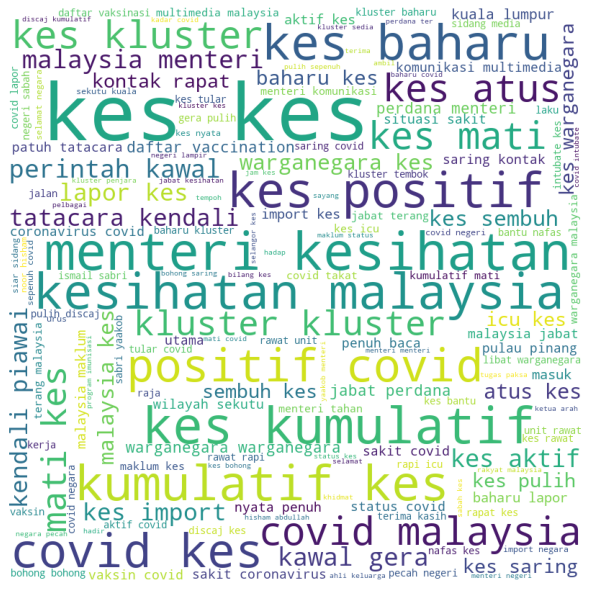

In [58]:
import matplotlib.pyplot as plt
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## 2.2.6 Build Bigram

In [35]:
fb_df['tokens_to_text']

date
1/1/2020    malaysia jaya tangan isu kumpul ganas kuasa pa...
1/1/2020    tahniah seri mohd zuki ali lantik ketua negara...
1/1/2021    nyata menteri tahan kena laksana perintah kawa...
1/1/2021    situasi januari malaysia kes kes kes pulih sak...
1/1/2021    tatacara kendali piawai perintah kawal gera pulih
                                  ...                        
9/9/2021    september duduk lembah klang vaksinasi sunti v...
9/9/2021    data analisa kena covid platform data covid pl...
9/9/2021    september kes covid lapor kes kes pecah negeri...
9/9/2021    atus kadar vaksinasi populasi dewasa malaysia ...
9/9/2021    status kapasiti katil covid vaksin kes baharu ...
Name: tokens_to_text, Length: 9141, dtype: object

In [36]:
# convert 'tokens_to_text' from series into list
#this will pass into lda model
fb_token_list_text = fb_df['tokens_to_text'].tolist()
fb_token_list_text

['malaysia jaya tangan isu kumpul ganas kuasa paksa pelbagai cabar menteri negeri muhyiddin yassin menteri negeri',
 'tahniah seri mohd zuki ali lantik ketua negara berkuatkuasa januari selamat jalan tugas jabat perdana ter',
 'nyata menteri tahan kena laksana perintah kawal gera perintah kawal gera pulih januari',
 'situasi januari malaysia kes kes kes pulih sakit pulih discaj kes mati catat mati kes risiko keluarga covid patuh perintah kawal gera pulih sebarang kena hubung hotline',
 'tatacara kendali piawai perintah kawal gera pulih',
 'negara mac menteri tahan ismail sabri yaakob',
 'vaksin malaysia berfasa februari utama tugas baris hadap golong risiko warga emas sakit kronik awam sumber',
 'nyata media menteri belia sukan tatacara kendali piawai norma baharu sektor sukan rekreasi sember layar paut portal maklumat tatacara kendali piawai',
 'selamat rakyat malaysia tugas baris hadap moga cekal bakti atur putus rantai covid negara jaga jaga keluarga jaga masyarakat negara inshaalla

In [37]:
fb_df['tokens']

date
1/1/2020    [malaysia, jaya, tangan, isu, kumpul, ganas, k...
1/1/2020    [tahniah, seri, mohd, zuki, ali, lantik, ketua...
1/1/2021    [nyata, menteri, tahan, kena, laksana, perinta...
1/1/2021    [situasi, januari, malaysia, kes, kes, kes, pu...
1/1/2021    [tatacara, kendali, piawai, perintah, kawal, g...
                                  ...                        
9/9/2021    [september, duduk, lembah, klang, vaksinasi, s...
9/9/2021    [data, analisa, kena, covid, platform, data, c...
9/9/2021    [september, kes, covid, lapor, kes, kes, pecah...
9/9/2021    [atus, kadar, vaksinasi, populasi, dewasa, mal...
9/9/2021    [status, kapasiti, katil, covid, vaksin, kes, ...
Name: tokens, Length: 9141, dtype: object

In [38]:
#turn tokens from series into list of list
fb_token_list_of_list = fb_df['tokens'].tolist()
fb_token_list_of_list

[['malaysia',
  'jaya',
  'tangan',
  'isu',
  'kumpul',
  'ganas',
  'kuasa',
  'paksa',
  'pelbagai',
  'cabar',
  'menteri',
  'negeri',
  'muhyiddin',
  'yassin',
  'menteri',
  'negeri'],
 ['tahniah',
  'seri',
  'mohd',
  'zuki',
  'ali',
  'lantik',
  'ketua',
  'negara',
  'berkuatkuasa',
  'januari',
  'selamat',
  'jalan',
  'tugas',
  'jabat',
  'perdana',
  'ter'],
 ['nyata',
  'menteri',
  'tahan',
  'kena',
  'laksana',
  'perintah',
  'kawal',
  'gera',
  'perintah',
  'kawal',
  'gera',
  'pulih',
  'januari'],
 ['situasi',
  'januari',
  'malaysia',
  'kes',
  'kes',
  'kes',
  'pulih',
  'sakit',
  'pulih',
  'discaj',
  'kes',
  'mati',
  'catat',
  'mati',
  'kes',
  'risiko',
  'keluarga',
  'covid',
  'patuh',
  'perintah',
  'kawal',
  'gera',
  'pulih',
  'sebarang',
  'kena',
  'hubung',
  'hotline'],
 ['tatacara', 'kendali', 'piawai', 'perintah', 'kawal', 'gera', 'pulih'],
 ['negara', 'mac', 'menteri', 'tahan', 'ismail', 'sabri', 'yaakob'],
 ['vaksin',
  'mala

In [39]:
fb_token_list_of_list[0]

['malaysia',
 'jaya',
 'tangan',
 'isu',
 'kumpul',
 'ganas',
 'kuasa',
 'paksa',
 'pelbagai',
 'cabar',
 'menteri',
 'negeri',
 'muhyiddin',
 'yassin',
 'menteri',
 'negeri']

In [40]:
# We use gensim for the bigram
# pass in list of list

# Build the bigram and trigram models
bigram = gensim.models.Phrases(fb_token_list_of_list, min_count=5, threshold=100)
#trigram = gensim.models.Phrases(bigram[tweets_token_list_of_list], min_count=5, threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

#form bigram,trigram
fb_df['bigram_token_list'] = [bigram_mod[line] for line in fb_token_list_of_list]
#tweets_df['trigram_token_list'] = [trigram_mod[bigram_mod[line]] for line in tweets_token_list_of_list]


In [41]:
print(fb_df['bigram_token_list'])
print(type(fb_df['bigram_token_list']))

date
1/1/2020    [malaysia, jaya, tangan, isu, kumpul, ganas, k...
1/1/2020    [tahniah, seri, mohd_zuki, ali, lantik, ketua,...
1/1/2021    [nyata, menteri, tahan, kena, laksana, perinta...
1/1/2021    [situasi, januari, malaysia, kes, kes, kes, pu...
1/1/2021    [tatacara, kendali, piawai, perintah, kawal, g...
                                  ...                        
9/9/2021    [september, duduk, lembah_klang, vaksinasi, su...
9/9/2021    [data, analisa, kena, covid, platform, data, c...
9/9/2021    [september, kes, covid, lapor, kes, kes, pecah...
9/9/2021    [atus, kadar, vaksinasi, populasi_dewasa, mala...
9/9/2021    [status, kapasiti, katil, covid, vaksin, kes, ...
Name: bigram_token_list, Length: 9141, dtype: object
<class 'pandas.core.series.Series'>


In [42]:
fb_df[1:100]

message  \
date                                                           
1/1/2020   Tahniah Datuk Seri Mohd Zuki Ali atas pelantik...   
1/1/2021   KENYATAAN AKHBAR MENTERI KANAN PERTAHANAN MENG...   
1/1/2021   Situasi terkini 1 Januari 2021 #COVID19 di Mal...   
1/1/2021    SOP PERINTAH KAWALAN PERGERAKAN PEMULIHAN (PKPP)   
1/1/2021   PKPP di seluruh negara dilanjutkan mulai hari ...   
...                                                      ...   
1/13/2021  ?n times of crisis and war, the whole nation m...   
1/13/2021  Status terkini COVID-19 setakat 13 Januari 202...   
1/13/2021                        SOP PKP : PENGANGKUTAN AWAM   
1/14/2020  ?????????????????? ?????????? ????????????????...   
1/14/2020  Kenyataan Akhbar KPK 14 Januari 2020 – Pembeka...   

                                                   semiclean  \
date                                                           
1/1/2020   tahniah datuk seri mohd zuki ali atas pelantik...   
1/1/2021   kenyataan akhbar menteri kanan pertahanan meng...   
1/1/2021   situasi terkini januari malaysia sebanyak kes ...   
1/1/2021      sop perintah kawalan pergerakan pemulihan pkpp   
1/1/2021   pkpp seluruh negara dilanjutkan mulai hari ini...   
...                                                      ...   
1/13/2021     time crisis war nation come fight common enemy   
1/13/2021  status terkini covid setakat januari jumlah se...   
1/13/2021                          sop pkp pengangkutan awam   
1/14/2020  seramai orang pelajar malaysia dipindahkan dar...   
1/14/2020  kenyataan akhbar kpk januari pembekalan vaksin...   

                                                   normalize  \
date                                                           
1/1/2020   [tahniah, datuk, seri, mohd, zuki, ali, atas, ...   
1/1/2021   [kenyataan, akhbar, menteri, kanan, pertahanan...   
1/1/2021   [situasi, terkini, januari, malaysia, sebanyak...   
1/1/2021   [tatacara pengendalian piawai, perintah, kawal...   
1/1/2021   [pkpp, seluruh, negara, dilanjutkan, mulai, ha...   
...                                                      ...   
1/13/2021  [masa, krisis, war, bangsa, datang, melawan, b...   
1/13/2021  [status, terkini, covid, setakat, januari, jum...   
1/13/2021  [tatacara pengendalian piawai, pkp, pengangkut...   
1/14/2020  [seramai, orang, pelajar, malaysia, dipindahka...   
1/14/2020  [kenyataan, akhbar, kpk, januari, pembekalan, ...   

                                      normalize_back_to_text  \
date                                                           
1/1/2020   tahniah datuk seri mohd zuki ali atas pelantik...   
1/1/2021   kenyataan akhbar menteri kanan pertahanan meng...   
1/1/2021   situasi terkini januari malaysia sebanyak kes ...   
1/1/2021   tatacara pengendalian piawai perintah kawalan ...   
1/1/2021   pkpp seluruh negara dilanjutkan mulai hari ini...   
...                                                      ...   
1/13/2021  masa krisis war bangsa datang melawan biasa enemy   
1/13/2021  status terkini covid setakat januari jumlah se...   
1/13/2021  tatacara pengendalian piawai pkp pengangkutan ...   
1/14/2020  seramai orang pelajar malaysia dipindahkan dar...   
1/14/2020  kenyataan akhbar kpk januari pembekalan vaksin...   

                                                       lemma  \
date                                                           
1/1/2020   [tahniah, datuk, seri, mohd, zuki, ali, atas, ...   
1/1/2021   [nyata, akhbar, menteri, kanan, tahan, kena, l...   
1/1/2021   [situasi, kini, januari, malaysia, banyak, kes...   
1/1/2021   [tatacara, kendali, piawai, perintah, kawal, g...   
1/1/2021   [pkpp, seluruh, negara, lanjut, mulai, hari, i...   
...                                                      ...   
1/13/2021  [masa, krisis, war, bangsa, datang, lawan, bia...   
1/13/2021  [status, kini, covid, takat, januari, jumlah, ...   
1/13/2021     [tatacara, kendali, piawai, pkp, angkut, awam]   
1/14/2020  [seram

In [46]:
# split the data into quarter 
processed_fb = pd.DataFrame(fb_df[['message','bigram_token_list']])
processed_fb

fb_2020Q1_list =processed_fb.loc['1/1/2020' : '3/31/2020']
fb_2020Q2_list = processed_fb.loc['4/1/2020' : '6/30/2020']
fb_2020Q3_list = processed_fb.loc['7/1/2020' : '9/30/2020']
fb_2020Q4_list = processed_fb.loc['10/1/2020' : '12/31/2020']
fb_2021Q1_list = processed_fb.loc['1/1/2021' : '3/1/2021']
fb_2021Q2_list = processed_fb.loc['4/1/2021' : '6/30/2021']
fb_2021Q3_list = processed_fb.loc['7/1/2021' : '9/30/2021']
fb_full_list =processed_fb.loc['1/1/2020' : '9/30/2021']

fb_2020Q1_list.to_csv("fb_2020Q1.csv")
fb_2020Q2_list.to_csv("fb_2020Q2.csv")
fb_2020Q3_list.to_csv("fb_2020Q3.csv")
fb_2020Q4_list.to_csv("fb_2020Q4.csv")
fb_2021Q1_list.to_csv("fb_2021Q1.csv")
fb_2021Q2_list.to_csv("fb_2021Q2.csv")
fb_2021Q3_list.to_csv("fb_2021Q3.csv")



In [44]:
fb_full_list 


message  \
date                                                           
1/1/2020   Malaysia berjaya menangani isu kumpulan pengga...   
1/1/2020   Tahniah Datuk Seri Mohd Zuki Ali atas pelantik...   
1/1/2021   KENYATAAN AKHBAR MENTERI KANAN PERTAHANAN MENG...   
1/1/2021   Situasi terkini 1 Januari 2021 #COVID19 di Mal...   
1/1/2021    SOP PERINTAH KAWALAN PERGERAKAN PEMULIHAN (PKPP)   
...                                                      ...   
9/30/2021  Kenyataan Akhbar KPK 30 September 2021 û Situa...   
9/30/2021  Pelaksanaan PKPD berkuatkuasa 1 & 2 Oktober hi...   
9/30/2021  Penamatan PKPD pada 1 Oktober 2021  #MKN50 #Ke...   
9/30/2021  Laporan Terkini Status COVID-19 & Vaksinasi 30...   
9/30/2021  KENYATAAN MEDIA KETUA PENGARAH KESELAMATAN NEG...   

                                           bigram_token_list  
date                                                          
1/1/2020   [malaysia, jaya, tangan, isu, kumpul, ganas, k...  
1/1/2020   [tahniah, seri, mohd_zuki, ali, lantik, ketua,...  
1/1/2021   [nyata, menteri, tahan, kena, laksana, perinta...  
1/1/2021   [situasi, januari, malaysia, kes, kes, kes, pu...  
1/1/2021   [tatacara, kendali, piawai, perintah, kawal, g...  
...                                                      ...  
9/30/2021  [nyata, september, situasi, sakit, coronavirus...  
9/30/2021          [laksana, berkuatkuasa, oktober, oktober]  
9/30/2021                                   [tamat, oktober]  
9/30/2021       [lapor, status, covid, vaksinasi, september]  
9/30/2021  [nyata, media, ketua, arah, selamat, negara, k...  

[8959 rows x 2 columns]

# 3.0 Topic Modelling

In [47]:
import pandas as pd
import nltk

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis.gensim_models
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
from spacy.tokenizer import Tokenizer

import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

import gensim
import gensim.corpora as corpora
from gensim import models
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW

from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint

# 3.1 LDA FB_2020Q1

In [60]:
# Create dictionary 
id2word = corpora.Dictionary(fb_2020Q1_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in fb_2020Q1_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus_tfidf[:1]]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('cabar', 0.3170819253178855),
  ('ganas', 0.4582435700787839),
  ('isu', 0.3023331667178347),
  ('jaya', 0.2517140067467928),
  ('kuasa', 0.3221384739542642),
  ('kumpul', 0.25811403685778767),
  ('malaysia', 0.05971690792931584),
  ('menteri', 0.15226460686615603),
  ('muhyiddin_yassin', 0.3239027213586628),
  ('negeri', 0.22960963431670253),
  ('paksa', 0.2111314272793697),
  ('pelbagai', 0.2559194297868655),
  ('tangan', 0.2643012202101802)]]

## 3.1.1 Finding Optimal Number of Topics for LDA based on Topic Coherence Score

In [62]:
#Defining a function to loop over number of topics to be used to find an 
#optimal number of topics
def coherence_values_computation(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=97, passes=10)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


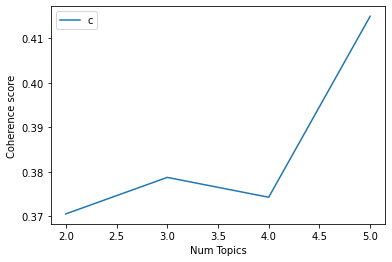

In [63]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=fb_2020Q1_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [80]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.3736
Num Topics = 3  is having Coherence Value of 0.3845
Num Topics = 4  is having Coherence Value of 0.3772
Num Topics = 5  is having Coherence Value of 0.4533


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [81]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False,num_words=15)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.012*"siar_sidang" + 0.012*"media" + 0.010*"yaakob" + 0.010*"ismail_sabri" '
  '+ 0.007*"tahan" + 0.007*"menteri" + 0.005*"jabat" + 0.004*"kesihatan" + '
  '0.004*"malaysia" + 0.004*"selamat" + 0.004*"info" + 0.003*"kembang" + '
  '0.003*"khidmat" + 0.003*"hospital" + 0.003*"negeri"'),
 (1,
  '0.054*"kes" + 0.013*"kluster" + 0.012*"covid" + 0.012*"mati" + '
  '0.011*"negeri" + 0.011*"pulih" + 0.011*"gera" + 0.011*"kumulatif" + '
  '0.010*"malaysia" + 0.009*"perintah" + 0.009*"kawal" + 0.009*"patuh" + '
  '0.009*"tatacara" + 0.009*"piawai" + 0.009*"kendali"'),
 (2,
  '0.008*"daftar" + 0.007*"vaccination" + 0.006*"vaksin" + 0.006*"kesihatan" + '
  '0.005*"menteri" + 0.005*"malaysia" + 0.004*"hospital" + 0.004*"selamat" + '
  '0.003*"mysejahtera" + 0.003*"jabat" + 0.003*"ncov" + 0.003*"perdana" + '
  '0.003*"covid" + 0.003*"program_imunisasi" + 0.003*"uji"')]


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
# alternative method
#fit corpus into model 
# k = 5
# lda_model = LdaModel(corpus_tfidf,
#                    num_topics = k,
#                    id2word = id2word,
#                    random_state=97,
#                    update_every=1,
#                    chunksize=100,
#                    alpha='auto',
#                    per_word_topics=True,
#                    passes=10)

# lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.026*"siar_sidang" + 0.023*"media" + 0.017*"yaakob" + 0.017*"ismail_sabri" + 0.011*"tahan" + 0.010*"menteri" + 0.008*"immunisation_programme" + 0.006*"info" + 0.005*"sinovac" + 0.005*"multimedia" + 0.005*"suruhanjaya_komunikasi" + 0.005*"pesan" + 0.004*"berita_palsu" + 0.004*"malaysia" + 0.004*"imigresen"'),
 (1,
  '0.019*"gera" + 0.016*"perintah" + 0.016*"patuh" + 0.016*"kes" + 0.015*"kawal" + 0.015*"tatacara" + 0.015*"piawai" + 0.015*"kendali" + 0.014*"mac" + 0.013*"negeri" + 0.013*"pulih" + 0.012*"pecah" + 0.012*"paksa" + 0.012*"februari" + 0.011*"malaysia"'),
 (2,
  '0.013*"twitter_youtube" + 0.005*"program_imunisasi" + 0.005*"sekolah" + 0.004*"selamat" + 0.004*"immunisation_programme" + 0.004*"info" + 0.003*"april" + 0.003*"bedah" + 0.003*"siber" + 0.002*"agens" + 0.002*"siar" + 0.002*"sibu" + 0.002*"akaun" + 0.002*"khas" + 0.002*"sinar"'),
 (3,
  '0.013*"daftar" + 0.011*"vaksin" + 0.011*"vaccination" + 0.009*"kesihatan" + 0.007*"lindung" + 0.007*"menteri" + 0.006*"covid"

In [83]:
# # Compute Coherence Score
# #coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
# coherence_model_lda = CoherenceModel(model=lda_model, texts=fb_2020Q1_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.4695828466744909


# 3.1.2 Intertopic Distance Map (IDM)

In [84]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.074416  0.058089       1        1  40.359804
1      0.148277  0.000145       2        1  38.991677
0     -0.073862 -0.058234       3        1  20.648519, topic_info=            Term        Freq       Total Category  logprob  loglift
40           kes  249.000000  249.000000  Default  30.0000  30.0000
111      kluster   58.000000   58.000000  Default  29.0000  29.0000
41          mati   54.000000   54.000000  Default  28.0000  28.0000
761  siar_sidang   29.000000   29.000000  Default  27.0000  27.0000
27          gera   48.000000   48.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
21        negara    6.184768   45.102196   Topic3  -5.9517  -0.4093
26         tugas    5.507334   34.343768   Topic3  -6.0677  -0.2528
196         raja    4.856531   17.711869   Topic3  -6.1935   0.2836
234         arah    4.842041   18.641297   Topic3  -6.1964   0.2295
36         covid    5.244431   74.184903   Topic3  -6.1166  -1.0719

[195 rows x 6 columns], token_table=      Topic      Freq                Term
term                                     
764       3  0.522785  abdullah_ayatuddin
102       2  0.964679               aktif
1179      1  0.211571               april
1179      3  0.634714               april
234       1  0.643732                arah
...     ...       ...                 ...
91        2  0.090760               virus
91        3  0.090760               virus
607       1  0.906656               wuhan
52        3  0.965842              yaakob
2769      2  0.897756           zon_hijau

[279 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [85]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_fb_2020Q1.csv", index=False)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.2 LDA FB_2020Q2

In [86]:
# Create dictionary 
id2word = corpora.Dictionary(fb_2020Q2_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in fb_2020Q2_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


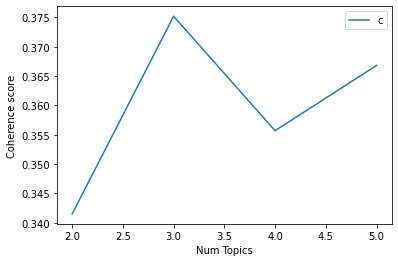

In [87]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=fb_2020Q2_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [88]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.3415
Num Topics = 3  is having Coherence Value of 0.3752
Num Topics = 4  is having Coherence Value of 0.3557
Num Topics = 5  is having Coherence Value of 0.3668


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.012*"menteri" + 0.012*"jabat" + 0.011*"malaysia" + 0.009*"tatacara" + '
  '0.009*"piawai" + 0.009*"kendali" + 0.008*"komunikasi_multimedia" + '
  '0.007*"perdana" + 0.007*"patuh" + 0.006*"perdana_ter" + 0.006*"operasi" + '
  '0.005*"tugas" + 0.005*"paksa" + 0.005*"terang" + 0.004*"kesihatan"'),
 (1,
  '0.059*"kes" + 0.015*"kumulatif" + 0.012*"mati" + 0.012*"perintah" + '
  '0.012*"kawal" + 0.011*"gera" + 0.011*"kluster" + 0.010*"negeri" + '
  '0.010*"pecah" + 0.010*"covid" + 0.010*"pulih" + 0.009*"discaj" + '
  '0.009*"warganegara" + 0.009*"jun" + 0.009*"menteri"'),
 (2,
  '0.026*"daftar" + 0.024*"vaccination" + 0.014*"vaksin" + 0.013*"dos" + '
  '0.011*"kembang" + 0.010*"vaksinasi" + 0.009*"do" + 0.008*"siar_sidang" + '
  '0.008*"media" + 0.007*"kesihatan" + 0.007*"nilai" + 0.006*"nombor" + '
  '0.006*"rosak" + 0.006*"tadbir" + 0.006*"covid"')]


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [90]:
#fit corpus into model 
k = 3
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.013*"menteri" + 0.012*"jabat" + 0.011*"do" + 0.010*"malaysia" + 0.009*"tatacara" + 0.009*"piawai" + 0.009*"kendali" + 0.008*"perdana" + 0.007*"patuh" + 0.007*"operasi" + 0.006*"selamat" + 0.006*"komunikasi_multimedia" + 0.006*"perdana_ter" + 0.005*"tugas" + 0.005*"paksa"'),
 (1,
  '0.064*"kes" + 0.020*"jun" + 0.019*"kumulatif" + 0.013*"mati" + 0.013*"perintah" + 0.012*"warganegara" + 0.012*"kawal" + 0.012*"gera" + 0.012*"pulih" + 0.012*"kluster" + 0.011*"covid" + 0.011*"negeri" + 0.011*"discaj" + 0.011*"pecah" + 0.009*"negara"'),
 (2,
  '0.027*"daftar" + 0.021*"vaccination" + 0.017*"vaksinasi" + 0.014*"vaksin" + 0.013*"dos" + 0.009*"tadbir" + 0.009*"kembang" + 0.009*"jun" + 0.006*"kesihatan" + 0.006*"siar_sidang" + 0.006*"media" + 0.006*"nilai" + 0.006*"terima" + 0.005*"nombor" + 0.005*"covid"')]

In [91]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=fb_2020Q2_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.3543102419845619


In [92]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.151903 -0.015070       1        1  37.322127
2      0.098460 -0.068743       2        1  34.711762
0      0.053443  0.083813       3        1  27.966112, topic_info=            Term        Freq       Total Category  logprob  loglift
10           kes  212.000000  212.000000  Default  30.0000  30.0000
166       daftar   89.000000   89.000000  Default  29.0000  29.0000
172  vaccination   81.000000   81.000000  Default  28.0000  28.0000
13     kumulatif   56.000000   56.000000  Default  27.0000  27.0000
204          dos   42.000000   42.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
117        duduk    7.330742   12.504129   Topic3  -5.9010   0.7402
222       daerah    8.721060   18.414941   Topic3  -5.7273   0.5268
47         wabak    5.816333    8.460183   Topic3  -6.1324   0.8995
11     kesihatan   11.878121   51.370431   Topic3  -5.4183  -0.1902
81        negara    7.094031   40.787135   Topic3  -5.9338  -0.4749

[175 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
217       1  0.951059          aktif
49        1  0.100000           amal
49        2  0.100000           amal
49        3  0.799997           amal
0         1  0.587506          april
...     ...       ...            ...
478       3  0.946940            yab
470       3  0.961372  yab_muhyiddin
471       3  0.910380         yassin
227       3  0.974257      zon_hijau
228       3  0.966460      zon_merah

[251 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1])

In [93]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_fb_2020Q2.csv", index=False)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.3 LDA FB_2020Q3

In [94]:
# Create dictionary 
id2word = corpora.Dictionary(fb_2020Q3_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in fb_2020Q3_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


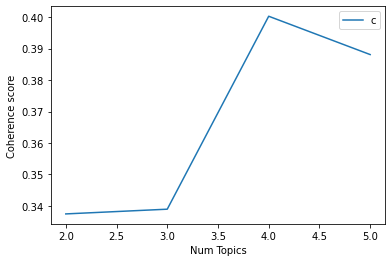

In [95]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=fb_2020Q3_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [96]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.3375
Num Topics = 3  is having Coherence Value of 0.339
Num Topics = 4  is having Coherence Value of 0.4003
Num Topics = 5  is having Coherence Value of 0.3881


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.006*"kendali" + 0.006*"tatacara" + 0.006*"piawai" + 0.006*"malaysia" + '
  '0.005*"tugas" + 0.005*"menteri" + 0.004*"negara" + 0.004*"kesihatan" + '
  '0.004*"jabat" + 0.004*"patuh" + 0.004*"lindung" + 0.004*"operasi" + '
  '0.004*"hospital" + 0.004*"terima" + 0.004*"selamat"'),
 (1,
  '0.055*"kes" + 0.021*"september" + 0.018*"lapor" + 0.018*"ogos" + '
  '0.017*"kluster" + 0.017*"kumulatif" + 0.014*"negeri" + 0.013*"malaysia" + '
  '0.013*"warganegara" + 0.012*"mati" + 0.012*"status" + 0.012*"tamat" + '
  '0.011*"covid" + 0.010*"vaksinasi" + 0.010*"nyata"'),
 (2,
  '0.024*"kadar" + 0.022*"pecah" + 0.021*"kes" + 0.020*"lampir" + '
  '0.019*"negeri" + 0.016*"kategori" + 0.012*"vaksinasi" + 0.011*"negara" + '
  '0.011*"atus" + 0.010*"lantan" + 0.010*"labu_putrajaya" + 0.010*"ogos" + '
  '0.010*"pahang" + 0.010*"lis" + 0.009*"perak"'),
 (3,
  '0.032*"do" + 0.028*"julai" + 0.027*"vaksin" + 0.018*"dos" + 0.016*"tadbir" '
  '+ 0.012*"daftar" + 0.008*"lapor" + 0.008*"negeri" + 0.007*

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
#fit corpus into model 
k = 4
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.007*"malaysia" + 0.006*"jabat" + 0.006*"kesihatan" + 0.006*"menteri" + 0.005*"hospital" + 0.005*"oktober" + 0.005*"selamat" + 0.005*"kendali" + 0.004*"tatacara" + 0.004*"piawai" + 0.004*"operasi" + 0.004*"tugas" + 0.004*"negara" + 0.004*"terima" + 0.003*"jalan"'),
 (1,
  '0.058*"kes" + 0.047*"september" + 0.023*"lapor" + 0.021*"kluster" + 0.019*"kumulatif" + 0.016*"negeri" + 0.015*"tamat" + 0.014*"status" + 0.014*"warganegara" + 0.014*"vaksinasi" + 0.014*"covid" + 0.013*"saring" + 0.012*"positif" + 0.012*"malaysia" + 0.011*"nyata"'),
 (2,
  '0.032*"kadar" + 0.026*"pecah" + 0.024*"lampir" + 0.023*"september" + 0.023*"negeri" + 0.021*"kes" + 0.018*"atus" + 0.017*"vaksinasi" + 0.015*"populasi_dewasa" + 0.012*"negara" + 0.012*"takat" + 0.012*"lantan" + 0.012*"rate" + 0.011*"johor" + 0.011*"pahang"'),
 (3,
  '0.039*"do" + 0.028*"vaksin" + 0.020*"julai" + 0.017*"katil" + 0.014*"dos" + 0.013*"bilang" + 0.012*"tadbir" + 0.011*"populasi" + 0.009*"kapasiti" + 0.007*"populasi_dewasa" + 

In [99]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=fb_2020Q3_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.35078916872812654


In [100]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.159612  0.035865       1        1  39.193774
0      0.085120  0.060322       2        1  28.612507
2      0.011632 -0.129544       3        1  16.631560
3      0.062860  0.033357       4        1  15.562159, topic_info=          Term        Freq       Total Category  logprob  loglift
22         kes  220.000000  220.000000  Default  30.0000  30.0000
238         do   46.000000   46.000000  Default  29.0000  29.0000
247     vaksin   51.000000   51.000000  Default  28.0000  28.0000
207      kadar   36.000000   36.000000  Default  27.0000  27.0000
102      julai   77.000000   77.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
7        covid    7.362319   67.391177   Topic4  -5.2193  -0.3538
185      takat    6.228018   42.901388   Topic4  -5.3866  -0.0695
236  vaksinasi    6.754830   68.343784   Topic4  -5.3054  -0.4540
73       media    5.320933   30.323252   Topic4  -5.5440   0.1201
78       tahan    4.922607   22.680979   Topic4  -5.6218   0.3326

[238 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
180       1  0.963672          aktif
471       2  0.884924   alhamdulilah
1017      2  0.827259            ali
0         1  0.130378           amal
0         2  0.782269           amal
...     ...       ...            ...
79        1  0.337105         yaakob
79        4  0.674211         yaakob
1015      4  0.767394            yab
927       4  0.804745  yab_muhyiddin
928       4  0.804728         yassin

[367 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [101]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_fb_2020Q3.csv", index=False)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.4 LDA FB_2020Q4

In [102]:
# Create dictionary 
id2word = corpora.Dictionary(fb_2020Q4_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in fb_2020Q4_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


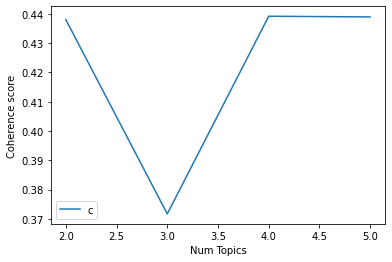

In [103]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=fb_2020Q4_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [104]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.438
Num Topics = 3  is having Coherence Value of 0.3717
Num Topics = 4  is having Coherence Value of 0.4392
Num Topics = 5  is having Coherence Value of 0.4389


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [105]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.044*"kes" + 0.024*"kluster" + 0.012*"covid" + 0.011*"pulih" + '
  '0.011*"negeri" + 0.010*"saring" + 0.009*"atus" + 0.008*"positif" + '
  '0.008*"sabah" + 0.007*"catat" + 0.007*"bohong" + 0.006*"baharu" + '
  '0.006*"selangor" + 0.005*"lapor" + 0.005*"maklum"'),
 (1,
  '0.003*"banci" + 0.002*"program" + 0.002*"sekolah" + 0.002*"produk" + '
  '0.002*"senarai" + 0.002*"kuat_kuasa" + 0.002*"tutup" + 0.002*"rakyat" + '
  '0.002*"sokong" + 0.002*"ahli" + 0.002*"portal" + 0.002*"kemaskini" + '
  '0.002*"maklumat" + 0.001*"statistik" + 0.001*"zon_merah"'),
 (2,
  '0.010*"selamat" + 0.005*"hospital" + 0.005*"siar" + 0.004*"rodzi_saad" + '
  '0.004*"arah" + 0.004*"negara" + 0.004*"timbal" + 0.003*"ubat" + '
  '0.003*"vaksin" + 0.003*"ketua" + 0.003*"majlis" + 0.003*"mobilisasi" + '
  '0.003*"segmen" + 0.003*"siber" + 0.003*"pegawai"'),
 (3,
  '0.012*"jabat" + 0.010*"malaysia" + 0.010*"menteri" + 0.009*"kendali" + '
  '0.009*"tatacara" + 0.009*"piawai" + 0.008*"operasi" + 0.008*"terang

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [106]:
#fit corpus into model 
k = 5
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.025*"kes" + 0.024*"kluster" + 0.012*"saring" + 0.008*"bohong" + 0.008*"negeri" + 0.007*"covid" + 0.007*"positif" + 0.006*"sabah" + 0.006*"hospital" + 0.006*"kontak_rapat" + 0.005*"warganegara" + 0.005*"selangor" + 0.005*"sedia" + 0.005*"baharu" + 0.004*"libat"'),
 (1,
  '0.003*"vaksin" + 0.003*"januari" + 0.003*"sekolah" + 0.003*"kuat_kuasa" + 0.002*"program" + 0.002*"didik" + 0.002*"rakyat" + 0.002*"ria" + 0.002*"portal" + 0.002*"senarai" + 0.002*"tutup" + 0.002*"sokong" + 0.002*"prihatin" + 0.001*"telipok" + 0.001*"sasar"'),
 (2,
  '0.012*"selamat" + 0.005*"siar" + 0.005*"arah" + 0.005*"rodzi_saad" + 0.005*"timbal" + 0.004*"negara" + 0.004*"ketua" + 0.003*"tajuk" + 0.003*"majlis" + 0.003*"siber" + 0.003*"segmen" + 0.002*"malaysia" + 0.002*"negeri" + 0.002*"sabah" + 0.002*"vaksin"'),
 (3,
  '0.010*"jabat" + 0.009*"kendali" + 0.009*"tatacara" + 0.009*"piawai" + 0.009*"malaysia" + 0.009*"menteri" + 0.008*"operasi" + 0.007*"patuh" + 0.007*"terang" + 0.006*"kawal" + 0.006*"tugas

In [107]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=fb_2020Q4_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.4393630670160884


In [108]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.049623  0.090304       1        1  34.983155
0      0.053786  0.022526       2        1  26.442017
4      0.103806 -0.017518       3        1  20.003278
2     -0.056880 -0.037739       4        1  11.888209
1     -0.051089 -0.057575       5        1   6.683341, topic_info=             Term       Freq      Total Category  logprob  loglift
22            kes  85.000000  85.000000  Default  30.0000  30.0000
93        kluster  24.000000  24.000000  Default  29.0000  29.0000
23      kumulatif  15.000000  15.000000  Default  28.0000  28.0000
126   siar_sidang  11.000000  11.000000  Default  27.0000  27.0000
125         media  12.000000  12.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
405         didik   0.333599   1.829743   Topic5  -6.5949   1.0036
367        rakyat   0.435673   4.831285   Topic5  -6.3279   0.2996
1244          hiv   0.268359   0.909203   Topic5  -6.8125   1.4853
1079       vaksin   0.291470   4.108626   Topic5  -6.7299   0.0596
587        sosial   0.269060   1.720069   Topic5  -6.8099   0.8504

[288 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
717       1  0.898030       abdullah
2398      2  0.727069          adnan
244       1  0.713312          agens
244       4  0.178328          agens
973       1  0.466205           ahli
...     ...       ...            ...
413       3  0.738298         yaakob
652       3  0.563031  yab_muhyiddin
653       3  0.563034         yassin
362       1  0.872184            zon
365       1  0.514803      zon_merah

[338 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 3, 2])

In [109]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_fb_2020Q4.csv", index=False)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.5 LDA FB_2021Q1

In [110]:
# Create dictionary 
id2word = corpora.Dictionary(fb_2021Q1_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in fb_2021Q1_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


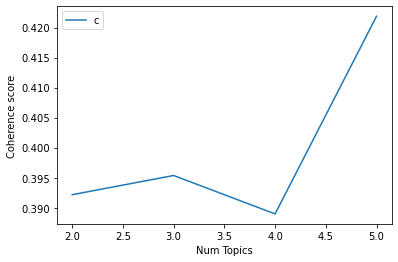

In [111]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=fb_2021Q1_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [112]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.3922
Num Topics = 3  is having Coherence Value of 0.3954
Num Topics = 4  is having Coherence Value of 0.389
Num Topics = 5  is having Coherence Value of 0.4219


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [113]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.059*"kes" + 0.015*"kluster" + 0.013*"mati" + 0.012*"kumulatif" + '
  '0.012*"covid" + 0.011*"malaysia" + 0.011*"menteri" + 0.010*"pulih" + '
  '0.009*"baharu" + 0.009*"negeri" + 0.009*"atus" + 0.008*"kesihatan" + '
  '0.007*"discaj" + 0.007*"siar_sidang" + 0.007*"yaakob"'),
 (1,
  '0.016*"tatacara" + 0.016*"piawai" + 0.016*"kendali" + 0.011*"patuh" + '
  '0.011*"paksa" + 0.008*"operasi" + 0.008*"februari" + 0.007*"kadar" + '
  '0.007*"tugas" + 0.007*"lampir" + 0.006*"daerah" + 0.006*"tabur" + '
  '0.005*"pecah" + 0.005*"negara" + 0.005*"covid"'),
 (2,
  '0.006*"vaksin" + 0.005*"info" + 0.005*"daftar" + 0.004*"hospital" + '
  '0.004*"kesihatan" + 0.004*"vaccination" + 0.004*"terima" + '
  '0.004*"chikungunya_zika" + 0.003*"malaysia" + 0.003*"ubat" + '
  '0.003*"vaksinasi" + 0.003*"selamat" + 0.003*"immunisation_programme" + '
  '0.003*"covid" + 0.003*"mysejahtera"'),
 (3,
  '0.008*"perintah" + 0.008*"kawal" + 0.007*"gera" + 0.005*"tahan" + '
  '0.005*"kuat_kuasa" + 0.004*"saba

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [114]:
#fit corpus into model 
k = 3
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.042*"kes" + 0.012*"menteri" + 0.011*"malaysia" + 0.010*"kluster" + 0.009*"mati" + 0.009*"covid" + 0.008*"pulih" + 0.008*"kumulatif" + 0.008*"kawal" + 0.008*"jabat" + 0.008*"kesihatan" + 0.008*"perintah" + 0.007*"gera" + 0.006*"baharu" + 0.006*"februari"'),
 (1,
  '0.019*"februari" + 0.014*"kendali" + 0.014*"tatacara" + 0.014*"piawai" + 0.012*"paksa" + 0.011*"patuh" + 0.011*"program_imunisasi" + 0.011*"operasi" + 0.010*"pecah" + 0.010*"lampir" + 0.010*"kadar" + 0.010*"immunisation_programme" + 0.009*"twitter_youtube" + 0.008*"tugas" + 0.008*"negara"'),
 (2,
  '0.007*"vaccination" + 0.007*"vaksin" + 0.006*"daftar" + 0.005*"selamat" + 0.004*"hospital" + 0.004*"terima" + 0.003*"ubat" + 0.003*"mysejahtera" + 0.003*"kesihatan" + 0.003*"tugas" + 0.003*"moga" + 0.003*"chikungunya_zika" + 0.003*"mysejahtera_app" + 0.003*"rakyat" + 0.003*"proses"')]

In [115]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=fb_2021Q1_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.38176408436462067


In [116]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.139863  0.007284       1        1  35.951420
2      0.051077 -0.054532       2        1  26.153562
3      0.026044 -0.022882       3        1  20.946304
1      0.062742  0.070130       4        1  16.948713, topic_info=         Term        Freq       Total Category  logprob  loglift
15        kes  197.000000  197.000000  Default  30.0000  30.0000
25   tatacara   27.000000   27.000000  Default  29.0000  29.0000
24     piawai   27.000000   27.000000  Default  28.0000  28.0000
92    kluster   48.000000   48.000000  Default  27.0000  27.0000
23    kendali   27.000000   27.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
774    terang    5.286710   22.709156   Topic4  -5.6518   0.3174
172    negeri    6.188865   45.918709   Topic4  -5.4942  -0.2291
5     menteri    6.111440   53.179133   Topic4  -5.5068  -0.3885
15        kes    5.315501  197.419250   Topic4  -5.6463  -1.8397
50     sember    3.819929   21.070058   Topic4  -5.9767   0.0674

[254 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
118       1  0.182222          agens
118       2  0.364445          agens
118       3  0.455556          agens
118       4  0.091111          agens
2031      3  0.785321            air
...     ...       ...            ...
29        1  0.943502         yaakob
29        3  0.042886         yaakob
510       1  0.869814  yab_muhyiddin
511       1  0.840699         yassin
2769      4  0.713594      zon_hijau

[423 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

In [117]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_fb_2021Q1.csv", index=False)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.6 LDA FB_2021Q2

In [118]:
# Create dictionary 
id2word = corpora.Dictionary(fb_2021Q2_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in fb_2021Q2_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


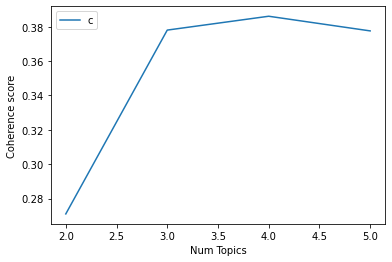

In [119]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=fb_2021Q2_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [120]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.2711
Num Topics = 3  is having Coherence Value of 0.3781
Num Topics = 4  is having Coherence Value of 0.3861
Num Topics = 5  is having Coherence Value of 0.3776


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.024*"vaccination" + 0.020*"daftar" + 0.016*"dos" + 0.015*"vaksin" + '
  '0.013*"vaksinasi" + 0.013*"do" + 0.012*"lampir" + 0.012*"kadar" + '
  '0.012*"perintah" + 0.012*"jun" + 0.011*"kes" + 0.011*"gera" + 0.011*"kawal" '
  '+ 0.010*"pecah" + 0.009*"april"'),
 (1,
  '0.073*"kes" + 0.020*"kumulatif" + 0.015*"kluster" + 0.013*"mati" + '
  '0.013*"warganegara" + 0.011*"baharu" + 0.011*"discaj" + 0.011*"covid" + '
  '0.009*"lapor" + 0.008*"aktif" + 0.008*"icu" + 0.007*"rawat" + 0.007*"jun" + '
  '0.007*"negeri" + 0.007*"malaysia"'),
 (2,
  '0.014*"menteri" + 0.013*"malaysia" + 0.013*"jabat" + 0.009*"tatacara" + '
  '0.009*"piawai" + 0.009*"kendali" + 0.008*"komunikasi_multimedia" + '
  '0.007*"perdana" + 0.007*"patuh" + 0.007*"selamat" + 0.006*"perdana_ter" + '
  '0.006*"kesihatan" + 0.006*"operasi" + 0.005*"terang" + 0.005*"paksa"'),
 (3,
  '0.025*"siar_sidang" + 0.025*"media" + 0.021*"daftar" + 0.018*"kembang" + '
  '0.018*"menteri" + 0.015*"kesihatan" + 0.013*"nilai" + 0.013*"

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [122]:
#fit corpus into model 
k = 3
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.024*"daftar" + 0.022*"vaccination" + 0.021*"jun" + 0.019*"vaksinasi" + 0.019*"vaksin" + 0.015*"dos" + 0.013*"perintah" + 0.013*"gera" + 0.012*"kawal" + 0.012*"do" + 0.011*"tadbir" + 0.010*"lampir" + 0.010*"kadar" + 0.009*"pecah" + 0.008*"negeri"'),
 (1,
  '0.076*"kes" + 0.023*"kumulatif" + 0.016*"mati" + 0.015*"warganegara" + 0.015*"jun" + 0.014*"kluster" + 0.013*"discaj" + 0.011*"baharu" + 0.010*"lapor" + 0.010*"covid" + 0.008*"aktif" + 0.008*"status" + 0.008*"sakit" + 0.008*"sabah" + 0.008*"tamat"'),
 (2,
  '0.013*"menteri" + 0.012*"malaysia" + 0.009*"jabat" + 0.009*"kesihatan" + 0.007*"kendali" + 0.007*"tatacara" + 0.007*"piawai" + 0.007*"kembang" + 0.006*"selamat" + 0.006*"perdana" + 0.006*"media" + 0.006*"siar_sidang" + 0.005*"operasi" + 0.005*"patuh" + 0.005*"daftar"')]

In [123]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=fb_2021Q2_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.36685915889114024


In [124]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.057378  0.108558       1        1  34.353002
1     -0.161989  0.009195       2        1  25.959496
0      0.012292 -0.076617       3        1  25.535283
3      0.092319 -0.041135       4        1  14.152219, topic_info=            Term        Freq       Total Category  logprob  loglift
49           kes  213.000000  213.000000  Default  30.0000  30.0000
0         daftar   82.000000   82.000000  Default  29.0000  29.0000
399  siar_sidang   35.000000   35.000000  Default  28.0000  28.0000
398        media   38.000000   38.000000  Default  27.0000  27.0000
7    vaccination   77.000000   77.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
391        pandu    2.174695    7.416047   Topic4  -6.4367   0.7285
641         arah    2.628573   15.903063   Topic4  -6.2472   0.1552
42        vaksin    2.904083   50.943079   Topic4  -6.1475  -0.9093
41        terima    2.531417   22.485162   Topic4  -6.2848  -0.2288
472    vaksinasi    2.160655   36.730692   Topic4  -6.4432  -0.8779

[232 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
79        2  0.950372      aktif
1497      4  0.607421       alpa
568       1  0.828661       amal
568       2  0.092073       amal
568       3  0.092073       amal
...     ...       ...        ...
401       1  0.057632     yaakob
401       4  0.922114     yaakob
395       1  0.835736     yassin
95        1  0.891683  zon_hijau
96        1  0.884672  zon_merah

[363 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])

In [125]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_fb_2021Q2.csv", index=False)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 3.7 LDA FB_2021Q3

In [126]:
# Create dictionary 
id2word = corpora.Dictionary(fb_2021Q3_list['bigram_token_list'])
#id2word.token2id

# bow
bow_corpus = [id2word.doc2bow(doc) for doc in fb_2021Q3_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(bow_corpus) 

corpus_tfidf = tfidf[bow_corpus]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


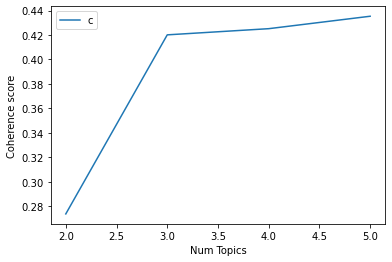

In [127]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=fb_2021Q3_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [128]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.2737
Num Topics = 3  is having Coherence Value of 0.4201
Num Topics = 4  is having Coherence Value of 0.4252
Num Topics = 5  is having Coherence Value of 0.4354


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.026*"vaksin" + 0.026*"do" + 0.024*"julai" + 0.018*"tamat" + 0.014*"dos" + '
  '0.013*"kategori" + 0.012*"tadbir" + 0.011*"vaksinasi" + 0.010*"daftar" + '
  '0.010*"vaccination" + 0.009*"lapor" + 0.009*"negeri" + 0.007*"ogos" + '
  '0.007*"covid" + 0.007*"terima"'),
 (1,
  '0.016*"negara" + 0.016*"menteri" + 0.015*"lampir" + 0.013*"kadar" + '
  '0.013*"media" + 0.011*"malaysia" + 0.011*"pecah" + 0.010*"kawal" + '
  '0.010*"gera" + 0.010*"perintah" + 0.010*"selamat" + 0.009*"negeri" + '
  '0.009*"tahan" + 0.008*"kena" + 0.008*"ketat"'),
 (2,
  '0.011*"pahang" + 0.011*"lantan" + 0.010*"labu_putrajaya" + 0.010*"lis" + '
  '0.010*"kes" + 0.010*"johor" + 0.010*"melaka" + 0.010*"sabah" + '
  '0.010*"perak" + 0.010*"negeri" + 0.009*"pulau_pinang" + 0.009*"sarawak" + '
  '0.009*"selangor" + 0.009*"kedah" + 0.008*"pecah"'),
 (3,
  '0.066*"kes" + 0.022*"september" + 0.021*"kumulatif" + 0.021*"lapor" + '
  '0.020*"kluster" + 0.020*"ogos" + 0.016*"vaksinasi" + 0.015*"warganegara" + '
  '0

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [130]:
#fit corpus into model 
k = 4
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.029*"do" + 0.027*"tamat" + 0.026*"vaksin" + 0.015*"julai" + 0.015*"september" + 0.010*"dos" + 0.010*"kategori" + 0.009*"vaksinasi" + 0.008*"tadbir" + 0.007*"walk" + 0.007*"daftar" + 0.007*"vaccination" + 0.006*"negeri" + 0.006*"terima" + 0.005*"covid"'),
 (1,
  '0.017*"negara" + 0.015*"menteri" + 0.015*"lampir" + 0.013*"media" + 0.013*"kadar" + 0.013*"kawal" + 0.013*"malaysia" + 0.012*"september" + 0.012*"perintah" + 0.012*"gera" + 0.011*"selamat" + 0.011*"pecah" + 0.010*"kena" + 0.010*"katil" + 0.010*"ketat"'),
 (2,
  '0.018*"berkuatkuasa" + 0.017*"oktober" + 0.016*"laksana" + 0.010*"september" + 0.010*"sabah" + 0.009*"lantan" + 0.009*"johor" + 0.009*"pahang" + 0.009*"negeri" + 0.009*"lis" + 0.009*"perak" + 0.009*"labu_putrajaya" + 0.008*"melaka" + 0.008*"sarawak" + 0.008*"kedah"'),
 (3,
  '0.068*"kes" + 0.041*"september" + 0.027*"lapor" + 0.024*"kluster" + 0.023*"kumulatif" + 0.022*"vaksinasi" + 0.018*"negeri" + 0.018*"status" + 0.016*"warganegara" + 0.016*"covid" + 0.016*"

In [131]:
# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=tweets_lda_model, texts=bigram_token_list2, dictionary=dictionary, coherence='c_v')
coherence_model_lda = CoherenceModel(model=lda_model, texts=fb_2021Q3_list['bigram_token_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.41264541597240717


In [132]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.165176  0.035086       1        1  32.854786
1     -0.087625  0.094857       2        1  27.333536
0     -0.014214 -0.116317       3        1  22.886999
2     -0.063338 -0.013627       4        1  16.924678, topic_info=          Term        Freq       Total Category  logprob  loglift
6          kes  224.000000  224.000000  Default  30.0000  30.0000
75          do   51.000000   51.000000  Default  29.0000  29.0000
85      vaksin   54.000000   54.000000  Default  28.0000  28.0000
7      kluster   60.000000   60.000000  Default  27.0000  27.0000
128      tamat   42.000000   42.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
2        covid    5.380316   69.291455   Topic4  -5.6159  -0.7792
159    menteri    4.696453   53.522809   Topic4  -5.7518  -0.6569
1128      ogos    4.305681   87.662304   Topic4  -5.8387  -1.2372
13    malaysia    4.055678   66.135848   Topic4  -5.8985  -1.0152
183      jabat    3.571753   25.851736   Topic4  -6.0256  -0.2029

[226 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1215      4  0.894012    aidiladha
261       1  0.964856        aktif
971       4  0.641303          ali
973       4  0.920488     anugerah
471       2  0.834325         arah
...     ...       ...          ...
845       4  0.089652         walk
214       4  0.673852         wang
193       1  0.978579  warganegara
169       2  0.983249       yaakob
969       2  0.855763          yab

[312 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

In [133]:
#store lda output to dataframe
import regex as re

output=[optimal_model]
topic_i = []
topics_w = []
# for i in range(optimal_model.num_topics):
#     topic_i.append(i)
    
for i in range(len(output)):
    topic_i.append(i)
    
    letters = []
    
    
    #for item, topics in lda_model.print_topics() :
    for item, topics in output[i].print_topics() :
        words = re.findall('[a-zA-Z]+', topics)
        letters.append(', '.join(words))
        
    topics_w.append(''.join(letters))
    
df = pd.DataFrame({'Topic': topic_i, 'Topic Words': topics_w })
print(df)

df.to_csv("lda_fb_2021Q3.csv", index=False)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# 3.8 LDA_FB_2020Q1-2021Q3 

In [98]:
# Create dictionary 
id2word = corpora.Dictionary(fb_full_list['bigram_token_list'])
#id2word.token2id

# bow
corpus = [id2word.doc2bow(doc) for doc in fb_full_list['bigram_token_list']]

# TFIDF
tfidf = models.TfidfModel(corpus) 

corpus_tfidf = tfidf[corpus]

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
#Defining a function to loop over number of topics to be used to find an 
#optimal number of tipics
def coherence_values_computation(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, random_state=97, passes=10)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


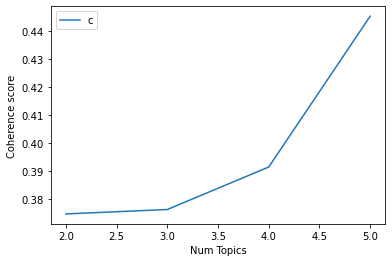

In [100]:
model_list, coherence_values = coherence_values_computation (
   dictionary=id2word, corpus=corpus_tfidf, texts=fb_full_list['bigram_token_list'], 
   start=2, limit=6,step=1
)

#show graph 
limit=6; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [101]:
#print the coherence scores

for m, cv in zip(x, coherence_values):
   print("Num Topics =", m, " is having Coherence Value of", round(cv, 4))

Num Topics = 2  is having Coherence Value of 0.3746
Num Topics = 3  is having Coherence Value of 0.3762
Num Topics = 4  is having Coherence Value of 0.3914
Num Topics = 5  is having Coherence Value of 0.4454


C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=30))

[(0,
  '0.012*"berkuatkuasa" + 0.009*"laksana" + 0.008*"vaksin" + '
  '0.008*"vaccination" + 0.008*"vaksinasi" + 0.007*"daftar" + 0.007*"terima" + '
  '0.004*"lindung" + 0.004*"kampung" + 0.004*"oktober" + 0.004*"julai" + '
  '0.003*"walk" + 0.003*"sunti" + 0.003*"bahagian" + 0.003*"do" + '
  '0.003*"mysejahtera" + 0.003*"sabah" + 0.003*"lantik" + 0.003*"maklumat" + '
  '0.003*"janji_temu" + 0.003*"covid" + 0.002*"mudah" + 0.002*"selamat" + '
  '0.002*"vaccinate" + 0.002*"nasional" + 0.002*"jalan" + 0.002*"kasih" + '
  '0.002*"ogos" + 0.002*"lokaliti" + 0.002*"awam"'),
 (1,
  '0.068*"kes" + 0.021*"kumulatif" + 0.020*"ogos" + 0.020*"september" + '
  '0.018*"lapor" + 0.018*"julai" + 0.017*"kluster" + 0.016*"negeri" + '
  '0.014*"covid" + 0.014*"mati" + 0.012*"warganegara" + 0.011*"vaksinasi" + '
  '0.011*"do" + 0.010*"baharu" + 0.010*"pulih" + 0.010*"takat" + '
  '0.010*"status" + 0.010*"discaj" + 0.010*"vaccination" + 0.009*"malaysia" + '
  '0.009*"nyata" + 0.008*"tamat" + 0.008*"atus" 

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [110]:
#fit corpus into model 
k = 3
lda_model = LdaModel(corpus_tfidf,
                   num_topics = k,
                   id2word = id2word,
                   random_state=97,
                   #update_every=1,
                   #chunksize=100,
                   #alpha='auto',
                   #per_word_topics=True,
                   passes=10)

lda_model.print_topics(num_words=15)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.010*"berkuatkuasa" + 0.009*"laksana" + 0.007*"selamat" + 0.006*"hospital" + 0.004*"negara" + 0.004*"malaysia" + 0.004*"jabat" + 0.004*"sabah" + 0.004*"tugas" + 0.003*"arah" + 0.003*"ubat" + 0.003*"khidmat" + 0.003*"ketua" + 0.003*"julai" + 0.003*"kesihatan"'),
 (1,
  '0.073*"kes" + 0.036*"september" + 0.022*"kumulatif" + 0.022*"ogos" + 0.022*"lapor" + 0.020*"negeri" + 0.019*"kluster" + 0.015*"covid" + 0.014*"mati" + 0.013*"warganegara" + 0.012*"pulih" + 0.012*"do" + 0.012*"takat" + 0.012*"status" + 0.012*"baharu"'),
 (2,
  '0.019*"vaccination" + 0.016*"menteri" + 0.014*"daftar" + 0.012*"kadar" + 0.012*"vaksinasi" + 0.011*"vaksin" + 0.011*"lampir" + 0.010*"malaysia" + 0.009*"siar_sidang" + 0.009*"media" + 0.008*"kesihatan" + 0.008*"dos" + 0.008*"jabat" + 0.007*"kendali" + 0.007*"tatacara"')]

In [111]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(optimal_model, corpus_tfidf, id2word)

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.083887  0.101156       1        1  40.590099
1      0.207969 -0.012245       2        1  34.819461
0     -0.124082 -0.088911       3        1  24.590439, topic_info=           Term        Freq       Total Category  logprob  loglift
40          kes  755.000000  755.000000  Default  30.0000  30.0000
114   kumulatif  226.000000  226.000000  Default  29.0000  29.0000
2463  september  225.000000  225.000000  Default  28.0000  28.0000
111     kluster  186.000000  186.000000  Default  27.0000  27.0000
116       lapor  205.000000  205.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
16        jalan   17.919839   61.764747   Topic3  -6.0651   0.1654
23      selamat   19.145588  102.453447   Topic3  -5.9990  -0.2745
53         awam   17.083755   48.330486   Topic3  -6.1129   0.3629
36        covid   19.593526  227.549121   Topic3  -5.9758  -1.0494
772        ogos   17.756051  248.719979   Topic3  -6.0743  -1.2368

[212 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
874       3  0.973892         advice
102       2  0.988976          aktif
13        1  0.149885            ali
13        3  0.824367            ali
7158      1  0.940753      alih_fasa
...     ...       ...            ...
2130      3  0.924210          weeks
52        1  0.991633         yaakob
525       1  0.960568            yab
520       1  0.942104  yab_muhyiddin
521       1  0.993768         yassin

[343 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

# 4.0 Visualisation 

## 4.1 Word Cloud of Topic Words

In [1]:
import pandas as pd
fb_topic_df = pd.read_csv("Data/GT_FB_Document_Similarity.csv",index_col=0)
fb_topic_df



Period                                                 GT  \
0  2020_Q1  tatacara, kendali, piawai, makna, bahagian, ha...   
1  2020_Q2  tatacara, kendali, piawai, malaysia, pkpb, cov...   
2  2020_Q3  tatacara, kendali, piawai, malaysia, pkpp, mak...   
3  2020_Q4  tatacara, kendali, piawai, pkpb, cmco, mkn, ma...   
4  2021_Q1  tatacara, kendali, piawai, malaysia, mco, miti...   
5  2021_Q2  tatacara, kendali, piawai, mco, sarawak, tatac...   
6  2021_Q3  tatacara, kendali, piawai, mkn,  fasa, pkp, pk...   

                                                  FB  wmdistance  
0  siar_sidang, media, yaakob, ismail_sabri, taha...    3.060240  
1  menteri, jabat, malaysia, tatacara, piawai, ke...    3.267527  
2  kendali, tatacara, piawai, malaysia, tugas, me...    3.347879  
3  kes, kluster, covid, pulih, negeri, saring, at...    3.005843  
4  kes, kluster, mati, kumulatif, covid, malaysia...    2.858314  
5  vaccination, daftar, dos, vaksin, vaksinasi, d...    3.318979  
6  vaksin, do, julai, tamat, dos, kategori, tadbi...    3.013693

In [12]:
#Make tokens a string again
# use it to pass into wordcloud
fb_topic_df['FB_topic_text'] = [''.join(map(str, l)) for l in fb_topic_df['FB']]
print(fb_topic_df[['FB_topic_text']])

                                       FB_topic_text
0  siar_sidang, media, yaakob, ismail_sabri, taha...
1  menteri, jabat, malaysia, tatacara, piawai, ke...
2  kendali, tatacara, piawai, malaysia, tugas, me...
3  kes, kluster, covid, pulih, negeri, saring, at...
4  kes, kluster, mati, kumulatif, covid, malaysia...
5  vaccination, daftar, dos, vaksin, vaksinasi, d...
6  vaksin, do, julai, tamat, dos, kategori, tadbi...


In [14]:
from wordcloud import WordCloud, STOPWORDS

# String together cleaned tokens from tweets
words_list = ' '.join(fb_topic_df['FB_topic_text']) 
stopwords = set(STOPWORDS)

# Word cloud configuration
wordcloud = WordCloud(width = 800, height = 800,
                     background_color = 'white',
                     stopwords = stopwords,
                     min_font_size = 10).generate(words_list)

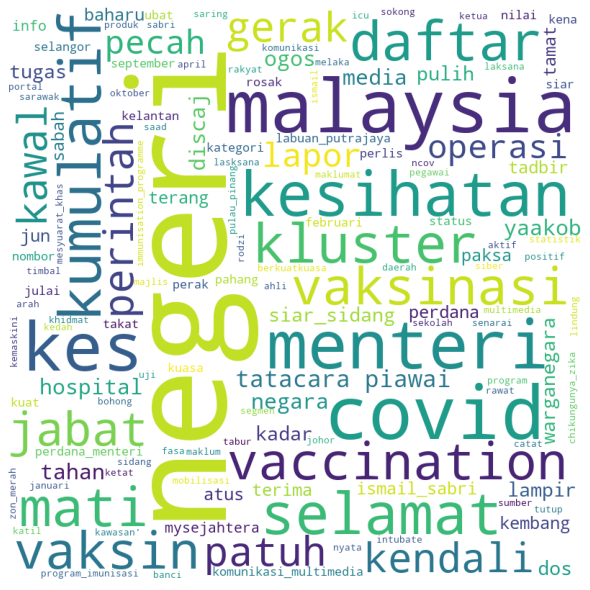

In [15]:
import matplotlib.pyplot as plt
# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [16]:
words_in_fb = [fb.lower().split(', ') for fb in fb_topic_df['FB']]
words_in_fb

[['siar_sidang',
  'media',
  'yaakob',
  'ismail_sabri',
  'tahan',
  'menteri',
  'jabat',
  'kesihatan',
  'malaysia',
  'selamat',
  'info',
  'kembang',
  'khidmat',
  'hospital',
  'negeri',
  ' kes',
  'kluster',
  'covid',
  'mati',
  'negeri',
  'pulih',
  'gerak',
  'kumulatif',
  'malaysia',
  'perintah',
  'kawal',
  'patuh',
  'tatacara',
  'piawai',
  'kendali',
  'daftar',
  'vaccination',
  'vaksin',
  'kesihatan',
  'menteri',
  'malaysia',
  'hospital',
  'selamat',
  'mysejahtera',
  'jabat',
  'ncov',
  'perdana',
  'covid',
  'program_imunisasi',
  'uji'],
 ['menteri',
  'jabat',
  'malaysia',
  'tatacara',
  'piawai',
  'kendali',
  'komunikasi_multimedia',
  'perdana',
  'patuh',
  'perdana_menteri',
  'operasi',
  'tugas',
  'paksa',
  'terang',
  'kesihatan',
  'kes',
  'kumulatif',
  'mati',
  'perintah',
  'kawal',
  'gerak',
  'kluster',
  'negeri',
  'pecah',
  'covid',
  'pulih',
  'discaj',
  'warganegara',
  'jun',
  'menteri',
  'daftar',
  'vaccination

In [17]:
import itertools
from itertools import permutations, combinations
import collections

In [18]:
# List of all words across tweets
all_words_fb_topic = list(itertools.chain(*words_in_fb))

# Create counter
counts_word_freq = collections.Counter(all_words_fb_topic)

counts_word_freq.most_common(30)

[('negeri', 14),
 ('malaysia', 13),
 ('covid', 13),
 ('menteri', 11),
 ('kes', 10),
 ('kesihatan', 9),
 ('selamat', 8),
 ('kumulatif', 8),
 ('kluster', 7),
 ('mati', 7),
 ('daftar', 7),
 ('vaccination', 7),
 ('vaksin', 7),
 ('vaksinasi', 7),
 ('jabat', 6),
 ('gerak', 6),
 ('perintah', 6),
 ('kawal', 6),
 ('patuh', 6),
 ('tatacara', 6),
 ('piawai', 6),
 ('kendali', 6),
 ('operasi', 6),
 ('pecah', 6),
 ('lapor', 6),
 ('media', 5),
 ('yaakob', 5),
 ('tahan', 5),
 ('hospital', 5),
 ('discaj', 5)]

In [24]:
fb_topic = pd.DataFrame(counts_word_freq.most_common(50),
                             columns=['words', 'count'])

fb_topic

words  count
0         negeri     14
1       malaysia     13
2          covid     13
3        menteri     11
4            kes     10
5      kesihatan      9
6        selamat      8
7      kumulatif      8
8        kluster      7
9           mati      7
10        daftar      7
11   vaccination      7
12        vaksin      7
13     vaksinasi      7
14         jabat      6
15         gerak      6
16      perintah      6
17         kawal      6
18         patuh      6
19      tatacara      6
20        piawai      6
21       kendali      6
22       operasi      6
23         pecah      6
24         lapor      6
25         media      5
26        yaakob      5
27         tahan      5
28      hospital      5
29        discaj      5
30        negara      5
31          ogos      5
32   siar_sidang      4
33         pulih      4
34         tugas      4
35   warganegara      4
36           dos      4
37            do      4
38         kadar      4
39        lampir      4
40  ismail_sabri      3
41       kembang      3
42       perdana      3
43         paksa      3
44        terang      3
45           jun      3
46        tadbir      3
47        terima      3
48         tamat      3
49          atus      3

## 4.2 Top 50 Topic Words in Facebook Government Post

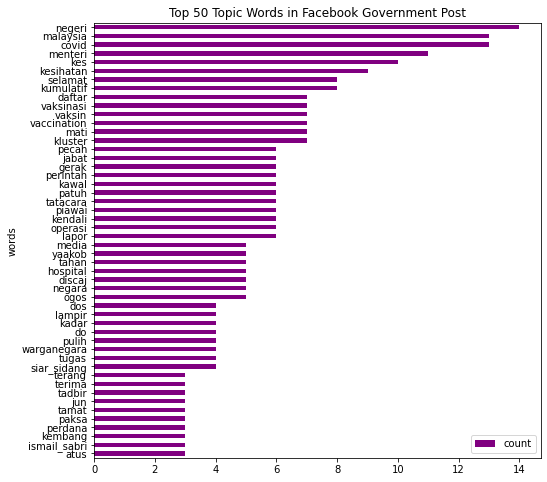

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
fb_topic.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Top 50 Topic Words in Facebook Government Post")

plt.show()

# 5.0 Topic Distribution


https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#10.-Word-Counts-of-Topic-Keywords

## 5.1 Dominant topic and its percentage contribution in each document

In [113]:
fb_full_list_text = fb_full_list['bigram_token_list'].tolist()
fb_full_list_text

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['malaysia',
  'jaya',
  'tangan',
  'isu',
  'kumpul',
  'ganas',
  'kuasa',
  'paksa',
  'pelbagai',
  'cabar',
  'menteri',
  'negeri',
  'muhyiddin_yassin',
  'menteri',
  'negeri'],
 ['tahniah',
  'seri',
  'mohd_zuki',
  'ali',
  'lantik',
  'ketua',
  'negara',
  'berkuatkuasa',
  'januari',
  'selamat',
  'jalan',
  'tugas',
  'jabat',
  'perdana_ter'],
 ['nyata',
  'menteri',
  'tahan',
  'kena',
  'laksana',
  'perintah',
  'kawal',
  'gera',
  'perintah',
  'kawal',
  'gera',
  'pulih',
  'januari'],
 ['situasi',
  'januari',
  'malaysia',
  'kes',
  'kes',
  'kes',
  'pulih',
  'sakit',
  'pulih',
  'discaj',
  'kes',
  'mati',
  'catat',
  'mati',
  'kes',
  'risiko',
  'keluarga',
  'covid',
  'patuh',
  'perintah',
  'kawal',
  'gera',
  'pulih',
  'sebarang',
  'kena',
  'hubung_hotline'],
 ['tatacara', 'kendali', 'piawai', 'perintah', 'kawal', 'gera', 'pulih'],
 ['negara', 'mac', 'menteri', 'tahan', 'ismail_sabri', 'yaakob'],
 ['vaksin',
  'malaysia',
  'berfasa',
  '

In [114]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus_tfidf, texts= fb_full_list_text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic



C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0               0             2.0              0.8395   
1               1             0.0              0.5370   
2               2             1.0              0.7682   
3               3             1.0              0.8585   
4               4             2.0              0.5760   
...           ...             ...                 ...   
8954         8954             1.0              0.8623   
8955         8955             0.0              0.7343   
8956         8956             1.0              0.5746   
8957         8957             1.0              0.7818   
8958         8958             1.0              0.8325   

                                               Keywords  \
0     menteri, malaysia, negara, jabat, lampir, kada...   
1     berkuatkuasa, laksana, vaksin, vaccination, va...   
2     kes, kumulatif, ogos, september, lapor, julai,...   
3     kes, kumulatif, ogos, september, lapor, julai,...   
4     menteri, malaysia, negara, jabat, lampir, kada...   
...                                                 ...   
8954  kes, kumulatif, ogos, september, lapor, julai,...   
8955  berkuatkuasa, laksana, vaksin, vaccination, va...   
8956  kes, kumulatif, ogos, september, lapor, julai,...   
8957  kes, kumulatif, ogos, september, lapor, julai,...   
8958  kes, kumulatif, ogos, september, lapor, julai,...   

                                                   Text  
0     [malaysia, jaya, tangan, isu, kumpul, ganas, k...  
1     [tahniah, seri, mohd_zuki, ali, lantik, ketua,...  
2     [nyata, menteri, tahan, kena, laksana, perinta...  
3     [situasi, januari, malaysia, kes, kes, kes, pu...  
4     [tatacara, kendali, piawai, perintah, kawal, g...  
...                                                 ...  
8954  [nyata, september, situasi, sakit, coronavirus...  
8955          [laksana, berkuatkuasa, oktober, oktober]  
8956                                   [tamat, oktober]  
8957       [lapor, status, covid, vaksinasi, september]  
8958  [nyata, media, ketua, arah, selamat, negara, k...  

[8959 rows x 5 columns]

## 5.2 Topic Distribution across documents

- https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#17howtofindtheoptimalnumberoftopicsforlda
- https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#6.-What-is-the-Dominant-topic-and-its-percentage-contribution-in-each-document

In [115]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(5)

#df_dominant_topics.to_csv("topic_distribution_fb.csv")

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dominant_Topic                                     Topic_Keywords  \
0.0             2.0  menteri, malaysia, negara, jabat, lampir, kada...   
1.0             0.0  berkuatkuasa, laksana, vaksin, vaccination, va...   
2.0             1.0  kes, kumulatif, ogos, september, lapor, julai,...   
3.0             1.0  kes, kumulatif, ogos, september, lapor, julai,...   
4.0             2.0  menteri, malaysia, negara, jabat, lampir, kada...   

     Num_Documents  Perc_Documents  
0.0         2039.0          0.2276  
1.0         3155.0          0.3522  
2.0         3765.0          0.4202  
3.0            NaN             NaN  
4.0            NaN             NaN

In [116]:
# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(df_dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()
df_dominant_topic_in_each_doc

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dominant_Topic  count
0             0.0   2039
1             1.0   3155
2             2.0   3765

C:\Users\user\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


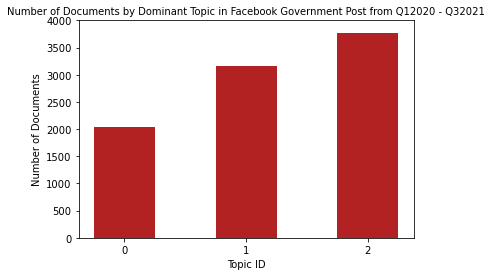

In [117]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# Plot
plt.plot()

# Topic Distribution by Dominant Topics
plt.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
plt.xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))

#tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
#plt.xaxis.set_major_formatter(tick_formatter)
plt.title('Number of Documents by Dominant Topic in Facebook Government Post from Q12020 - Q32021', fontdict=dict(size=10))
plt.xlabel('Topic ID')
plt.ylabel('Number of Documents')
plt.ylim(0, 4000)


# plt.xscale('log') 
# plt.xlabel('GDP per Capita [in USD]')
# plt.ylabel('Life Expectancy [in years]')
# plt.title('World Development in 2007')

# # Topic Distribution by Topic Weights
# ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
# ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
# ax2.xaxis.set_major_formatter(tick_formatter)
# ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()